# Adult Census Income: Project Overview

For a more detailed project overview, please see the `Read Me` file in the Repo.

## Problem Definition:

>Given a Census with general information about randomly choosen US citizens, can we predict whether their annual income is above or below 50K? 


## Data 

The data is provided by:
 
http://archive.ics.uci.edu/ml/machine-learning-databases/adult/


## 3. Evaluation

>Will be the model able to reach a 95% Accuracy at predicting whether a US citizen has an yearly income higher or lower than 50K?


## 4. Features

* **age:**
continuous value

* **workclass:** 
Private  Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

* **fnlwgt:**
continuousvalue (~ final weight. In other words, this is the number of people the census believes
the entry represents) 

* **education:** 
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* **education_num:** 
continuous value

* **marital_status:** 
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* **occupation:** 
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* **relationship:** 
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* **race:** 
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* **sex:** 
Female, Male.

* **capital_gain:**
continuous value.

* **capital_loss:** 
continuous value.

* **hours_per_week:** 
continuous value.

* **native_country:** 
United-States,  Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South China,	Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

* **class:** >50K or <50K

In [1]:
# Importing the tools
# Regular EDA (Exploratory Data Analaysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#we want our plot to appear inside teh notebook

# Models SKlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

print('Setup Complete!')

Setup Complete!


In [2]:
df = pd.read_csv('My_Projects_Data/4. Adult_Dataset/adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.dtypes.value_counts()

object    9
int64     6
dtype: int64

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

## Data exploration (EDA - Exploratory Data Analysis)

The goal is to find out more about the data, using Matplotlib and Searborn libraries, visualizing it on graphs and charts.

In [5]:
df['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

In [16]:
print(f'Label class distribution:\n <=50K: {round(24720/(24720+7841),2)*100}% \n >50K: {round(7841/(24720+7841), 2)*100}%')

Label class distribution:
 <=50K: 76.0% 
 >50K: 24.0%


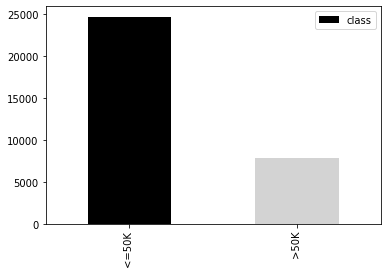

In [10]:
# Check how the class values are distributes

df['class'].value_counts().plot(kind='bar', color=['black', 'lightgrey'], legend='best');

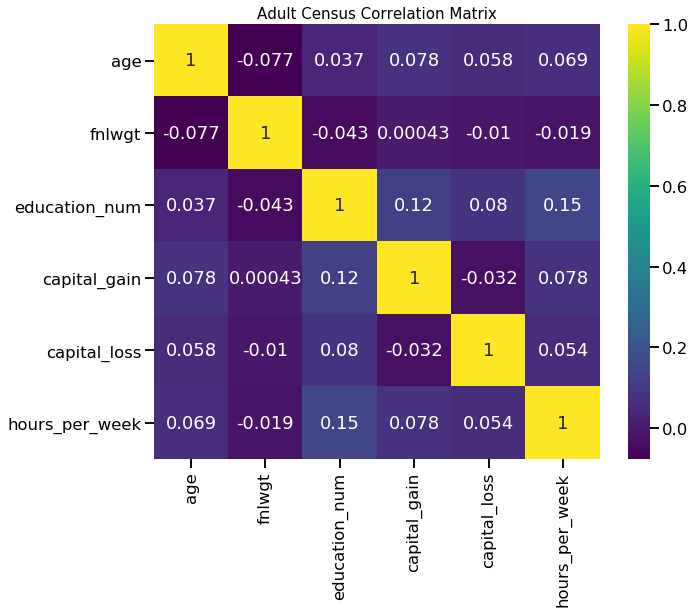

In [65]:
# Plot a correlation matrix, before preprocessing and cleaning data, to see how features are related to each other
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=corr_matrix, annot=True, cmap='viridis')
ax.set_title('Adult Census Correlation Matrix', fontsize=15);

### Native countries

Check ripartition of Native Countries between people surveyed

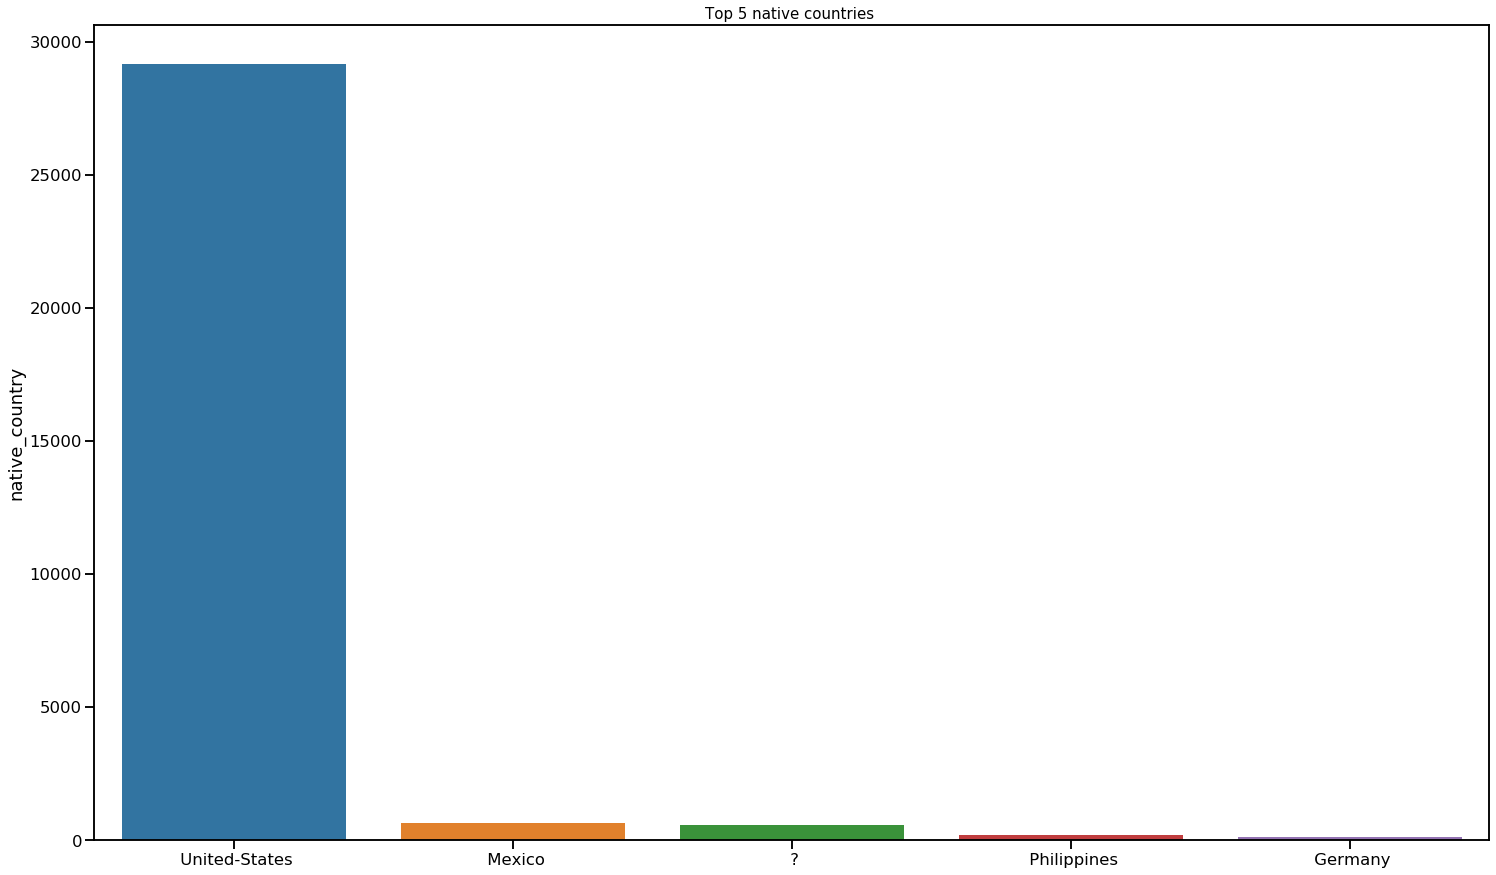

In [61]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(25, 15))
c = df['native_country'].value_counts()[:5]
ax = sns.barplot(x = c.index, y = c)
ax.set_title('Top 5 native countries ', fontsize=15);

We notice that mayority of the citizens who took part in the census were born in the USA (89.58% overall).
Let's have a look now to the other countries excluding the USA.

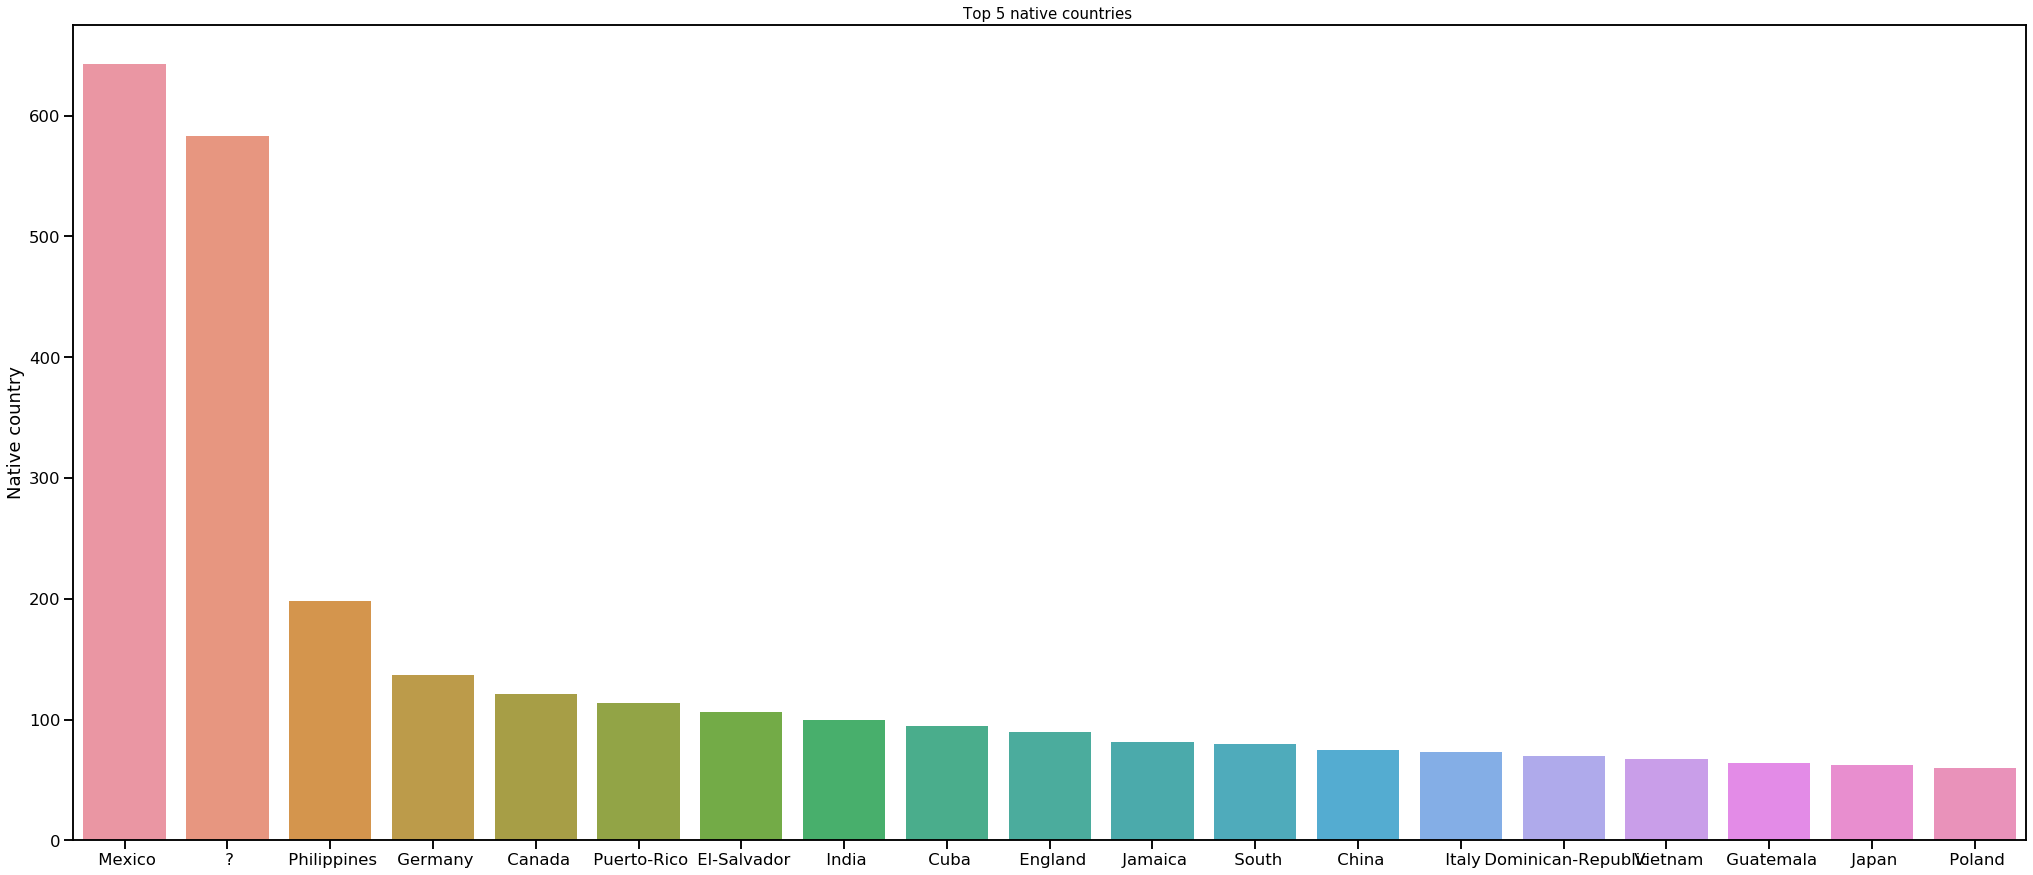

In [64]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(35, 15))
c = df['native_country'].value_counts()[1:20]
ax = sns.barplot(x = c.index, y = c)
ax.set_title('Top 5 native countries ', fontsize=15)
plt.ylabel('Native country');

### Sex distribution

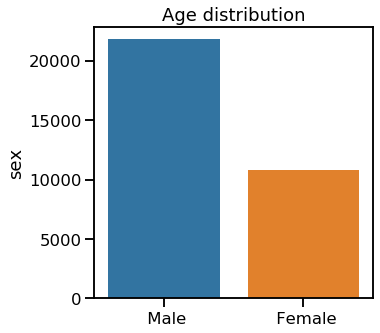

In [3]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(5,5))
s = df.sex.value_counts()
ax = sns.barplot(x = s.index, y = s)
plt.title('Age distribution');

### Education


 Sorted by type of education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 Total number of different educations: 32561


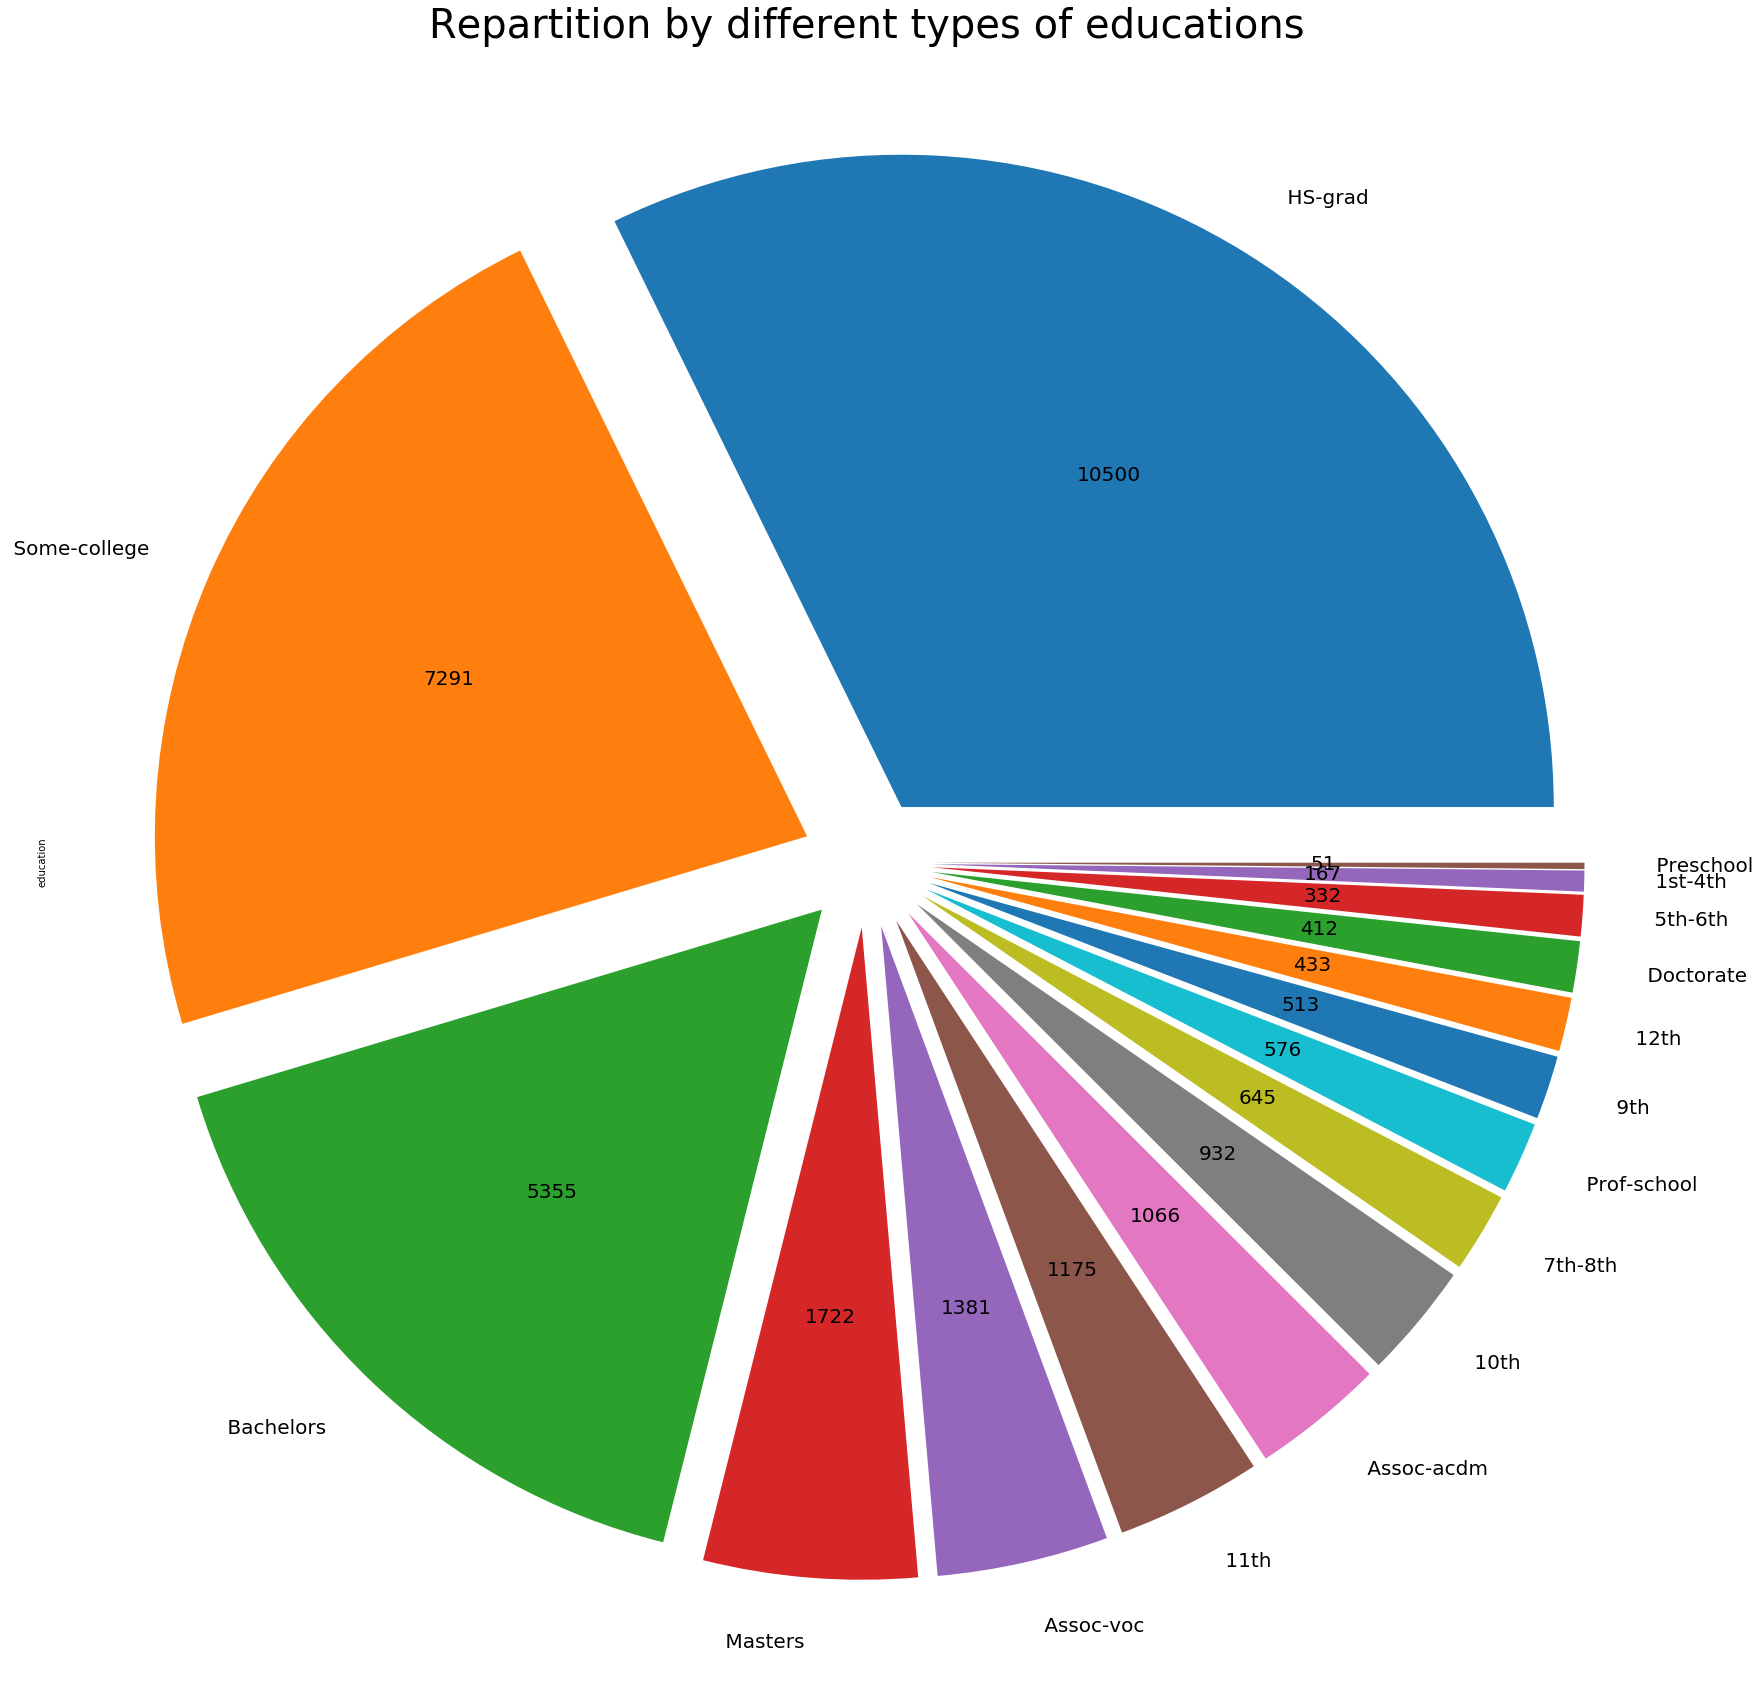

In [8]:
#Get sorting of cities by number of restaurants
global_ed = df['education'].value_counts()
print("\n Sorted by type of education \n")
print(global_ed)
total_ed = global_ed.sum()
print("\n Total number of different educations: {}".format(total_ed))

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
explode = [0.1 for i in global_ed]
global_ed.plot(kind='pie',
               figsize=(30, 30),
               explode=explode,
               fontsize=20,
               autopct=lambda v: int(v*total_ed/100))
plt.title(label="Repartition by different types of educations",
          fontdict={'fontsize': 40})
plt.show()

### Occupation

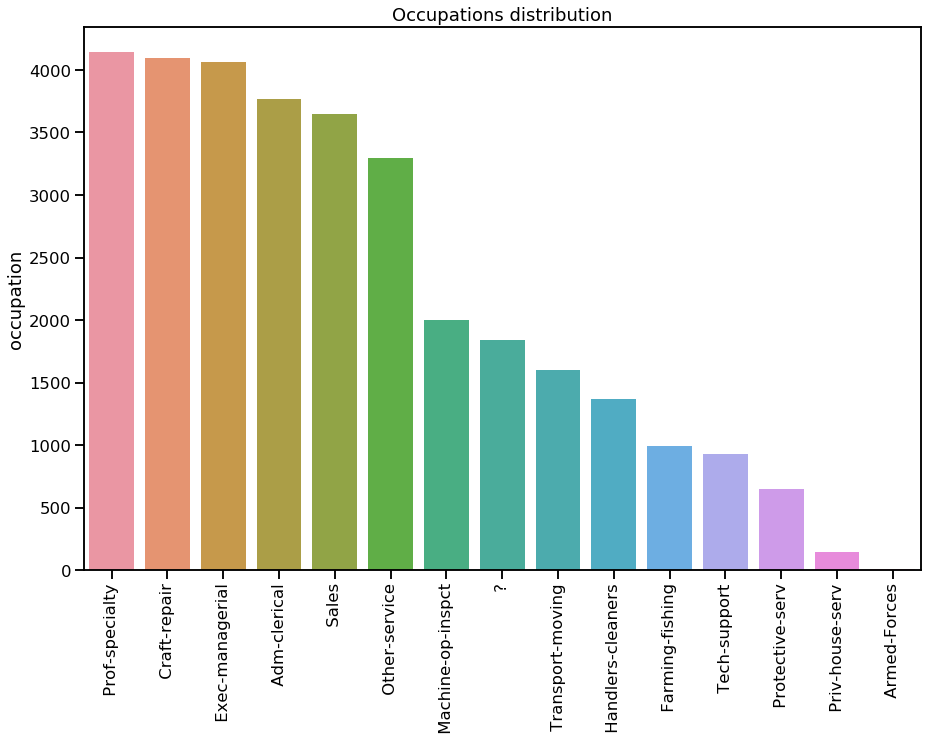

In [105]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,10))
o = df.occupation.value_counts()
ax = sns.barplot(x = o.index, y=o)
plt.xticks(rotation=90)
plt.title('Occupations distribution');

### Relationship status

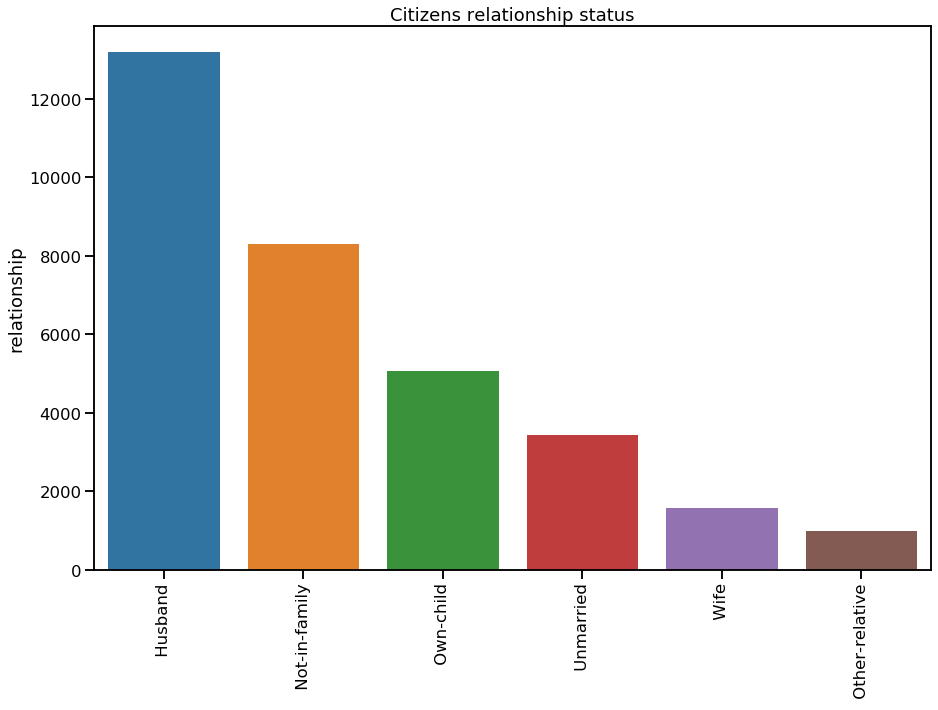

In [107]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,10))
o = df.relationship.value_counts()
ax = sns.barplot(x = o.index, y=o)
plt.xticks(rotation=90)
plt.title('Citizens relationship status');

### Capital Loss vs Education

Check whether there is a relationship between kind of Education and Capital Loss.

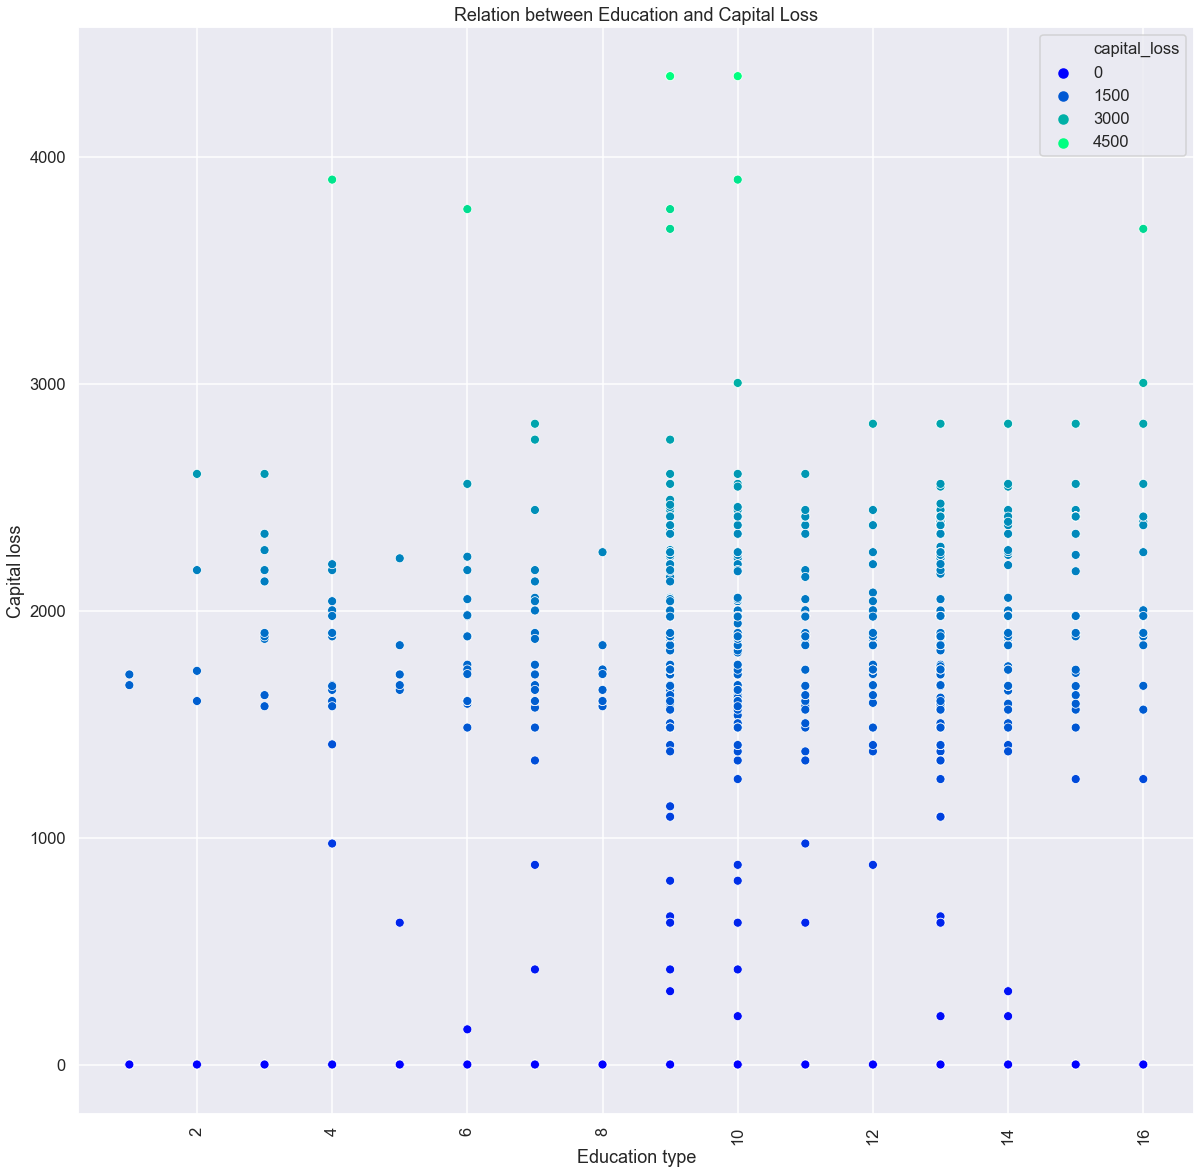

In [98]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.scatterplot(y=df['capital_loss'], x=df['education_num'], hue=df['capital_loss'], palette='winter')
plt.xticks(rotation=90)
plt.title('Relation between Education and Capital Loss')
plt.ylabel('Capital loss')
plt.xlabel('Education type');

### Capital Gain vs Education

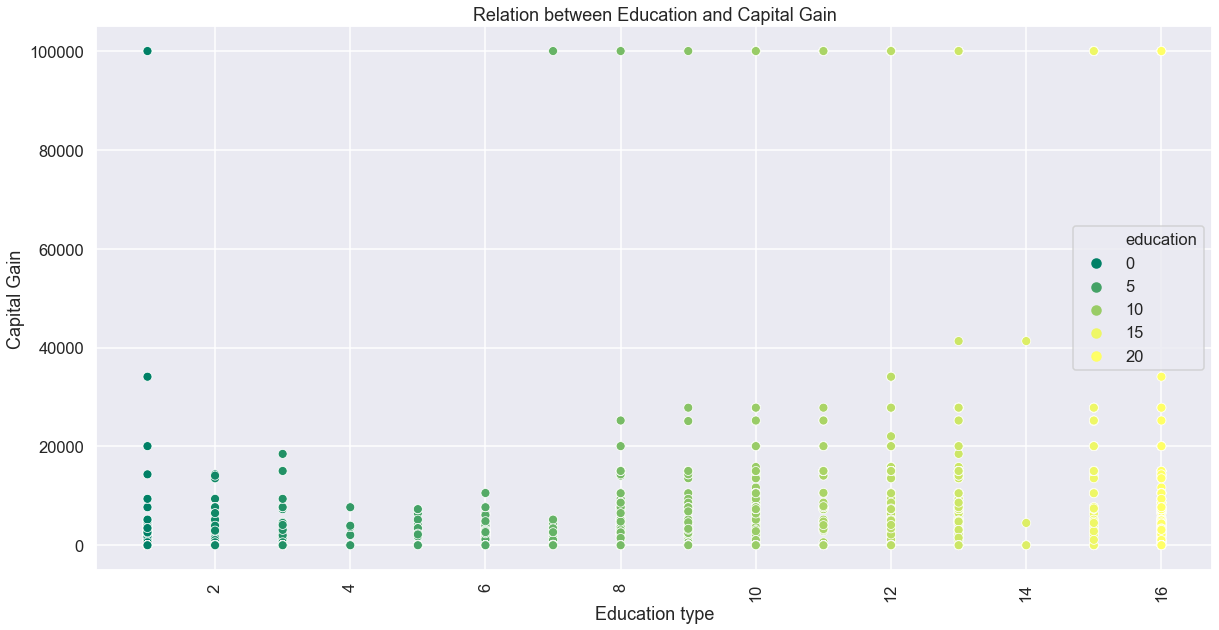

In [97]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(y=df['capital_gain'], x=df['education'], hue=df['education'], palette='summer')
plt.xticks(rotation=90)
plt.title('Relation between Education and Capital Gain')
plt.ylabel('Capital Gain')
plt.xlabel('Education type');

### Age distribution

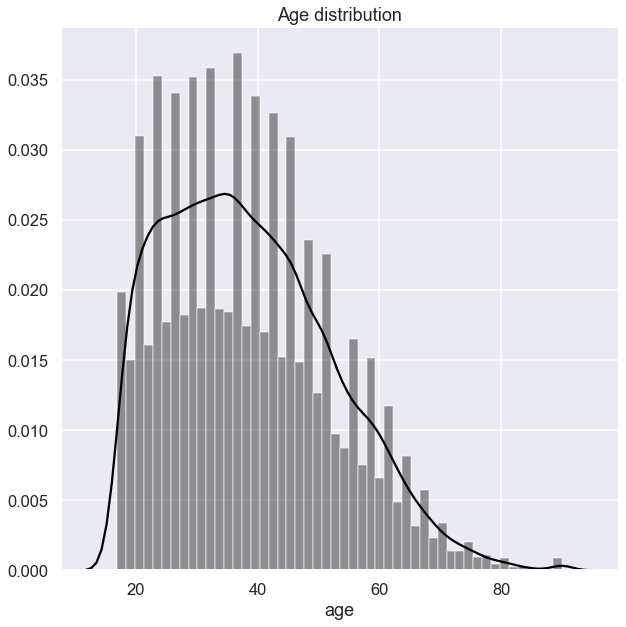

In [103]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.distplot(df.age, norm_hist=True,color='black')
plt.title('Age distribution')
plt.grid(True);

## Outliers identification 

Create a function to determine whether or not a certain feature has outliers within its records

In [138]:
def calc_outliers(df_num):
    """
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics and numerical feature that you set on input
    """
    # 1. Calculating the mean and standard deviation of the array
    data_std, data_mean = np.std(df_num), np.mean(df_num)
    
    # 2. Set the cut line to both higher and lower values
    cut = data_std*3
    
    # 3. Calculating the upper and lower cut values
    upper, lower = data_mean + cut, data_mean - cut
    
    # 4. Creating an array of lower, higher and total outliers values
    outliers_lower = [x for x in df_num if x < lower]
    outliers_upper = [x for x in df_num if x > upper]
    outliers_total = outliers_lower + outliers_upper
    
     # 5. Array without outliers values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    # 6. Printing total number of upper outliers, lower outliers, aggregate of outliers, non outliers and percentage on total of outliers
    
    print(f'The mean value is: {round(data_mean,2)}')
    print(f'The lower cut value is: {round(lower,2)}')
    print(f'The upper cut value is: {round(upper,2)}')
    print('Identified lower outliers: %d' % len(outliers_lower))
    
    print(f'Indentified upper outliers: {len(outliers_upper)}')
    
    print(f'Identified total number of lower and upper outliers: {len(outliers_total)}')
    
    print(f'Non-outliers observation: {len(outliers_removed)}')
    
    print(f'Percentage of outliers on total: {round(len(outliers_total)/len(outliers_removed)*100, 2)}%')   

The mean value is: 87.3
The lower cut value is: -1121.56
The upper cut value is: 1296.17
Identified lower outliers: 0
Indentified upper outliers: 1470
Identified total number of lower and upper outliers: 1470
Non-outliers observation: 31091
Percentage of outliers on total: 4.73%


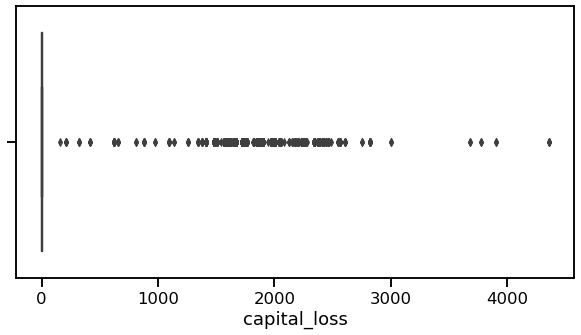

In [148]:
calc_outliers(df['capital_loss'])

fig, ax = plt.subplots(figsize=(10,5))
cl = df['capital_loss']
ax = sns.boxplot(x=cl)

The mean value is: 1077.65
The lower cut value is: -21077.89
The upper cut value is: 23233.18
Identified lower outliers: 0
Indentified upper outliers: 215
Identified total number of lower and upper outliers: 215
Non-outliers observation: 32346
Percentage of outliers on total: 0.66%


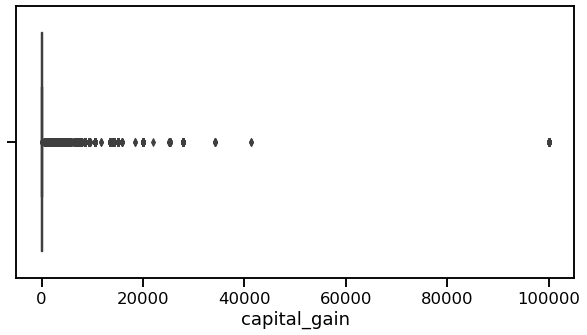

In [149]:
calc_outliers(df['capital_gain'])

fig, ax = plt.subplots(figsize=(10,5))
cl = df['capital_gain']
ax = sns.boxplot(x=cl)

The mean value is: 10.08
The lower cut value is: 2.36
The upper cut value is: 17.8
Identified lower outliers: 219
Indentified upper outliers: 0
Identified total number of lower and upper outliers: 219
Non-outliers observation: 32342
Percentage of outliers on total: 0.68%


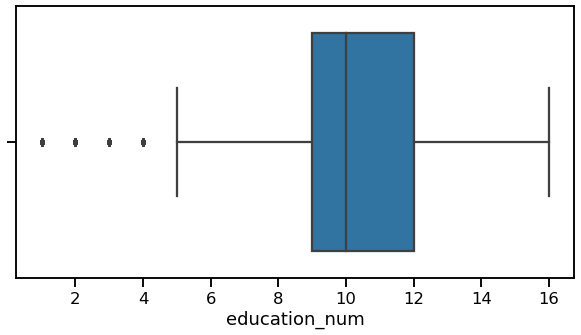

In [150]:
calc_outliers(df['education_num'])
fig, ax = plt.subplots(figsize=(10,5))
cl = df['education_num']
ax = sns.boxplot(x=cl)

### Different type of data and missing values

First step is to understand how many different types of data are contained in our DataFrame; then we need to turn all non numerical features into numerical in order to be processed by our estimators in the modelling phase.

Different features data types within the dataframe: 

object    9
int64     6
dtype: int64


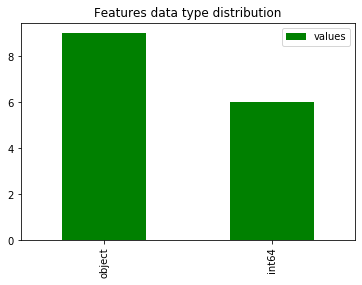

In [9]:
print('Different features data types within the dataframe: \n')
print(df.dtypes.value_counts())

df_data_type = pd.DataFrame(data=df.dtypes.value_counts(), columns=['values'])
df_data_type.plot(kind='bar', color='g', title='Features data type distribution');

In [11]:
# Create a new df1 Dataframe, which is a copy of the original df
df1 = df

# Check Objects features 
l = []
for label, content in df1.items():
    if pd.api.types.is_object_dtype(content):
        print(label)
        l.append(label)
print(f'Number of Object dtype colums is: {len(l)}')

workclass
education
marital_status
occupation
relationship
race
sex
native_country
class
Number of Object dtype colums is: 9


In [13]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

## Data Cleaning

### Preprocess function

Create a function that  fills all missing data and turn all non numerical data into numerical.

In [14]:
def preprocess_data(df):
    """
    Performs transformations on the DataFrame (df) and returns its transformation.  
    """
    
    # Fill NUMERICAL missing data
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill numeric values with median
                df[label] = content.fillna(content.median())            
        if not pd.api.types.is_numeric_dtype(content):
            # Convert the non numeric to categorical and then access to their codes and eventually add+1
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [15]:
preprocess_data(df1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,8,77516,10,13,5,2,2,5,2,2174,0,40,40,1
1,50,7,83311,10,13,3,5,1,5,2,0,0,13,40,1
2,38,5,215646,12,9,1,7,2,5,2,0,0,40,40,1
3,53,5,234721,2,7,3,7,1,3,2,0,0,40,40,1
4,28,5,338409,10,13,3,11,6,3,1,0,0,40,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,5,257302,8,12,3,14,6,5,1,0,0,38,40,1
32557,40,5,154374,12,9,3,8,1,5,2,0,0,40,40,2
32558,58,5,151910,12,9,7,2,5,5,1,0,0,40,40,1
32559,22,5,201490,12,9,5,2,4,5,2,0,0,20,40,1


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int8 
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int8 
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int8 
 6   occupation      32561 non-null  int8 
 7   relationship    32561 non-null  int8 
 8   race            32561 non-null  int8 
 9   sex             32561 non-null  int8 
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int8 
 14  class           32561 non-null  int8 
dtypes: int64(6), int8(9)
memory usage: 1.8 MB


#### Correlation matrix after conversion

Once all features have been converted to numerical, we can plot again a correlation matrix to check how the label `class` is correlated to other features.

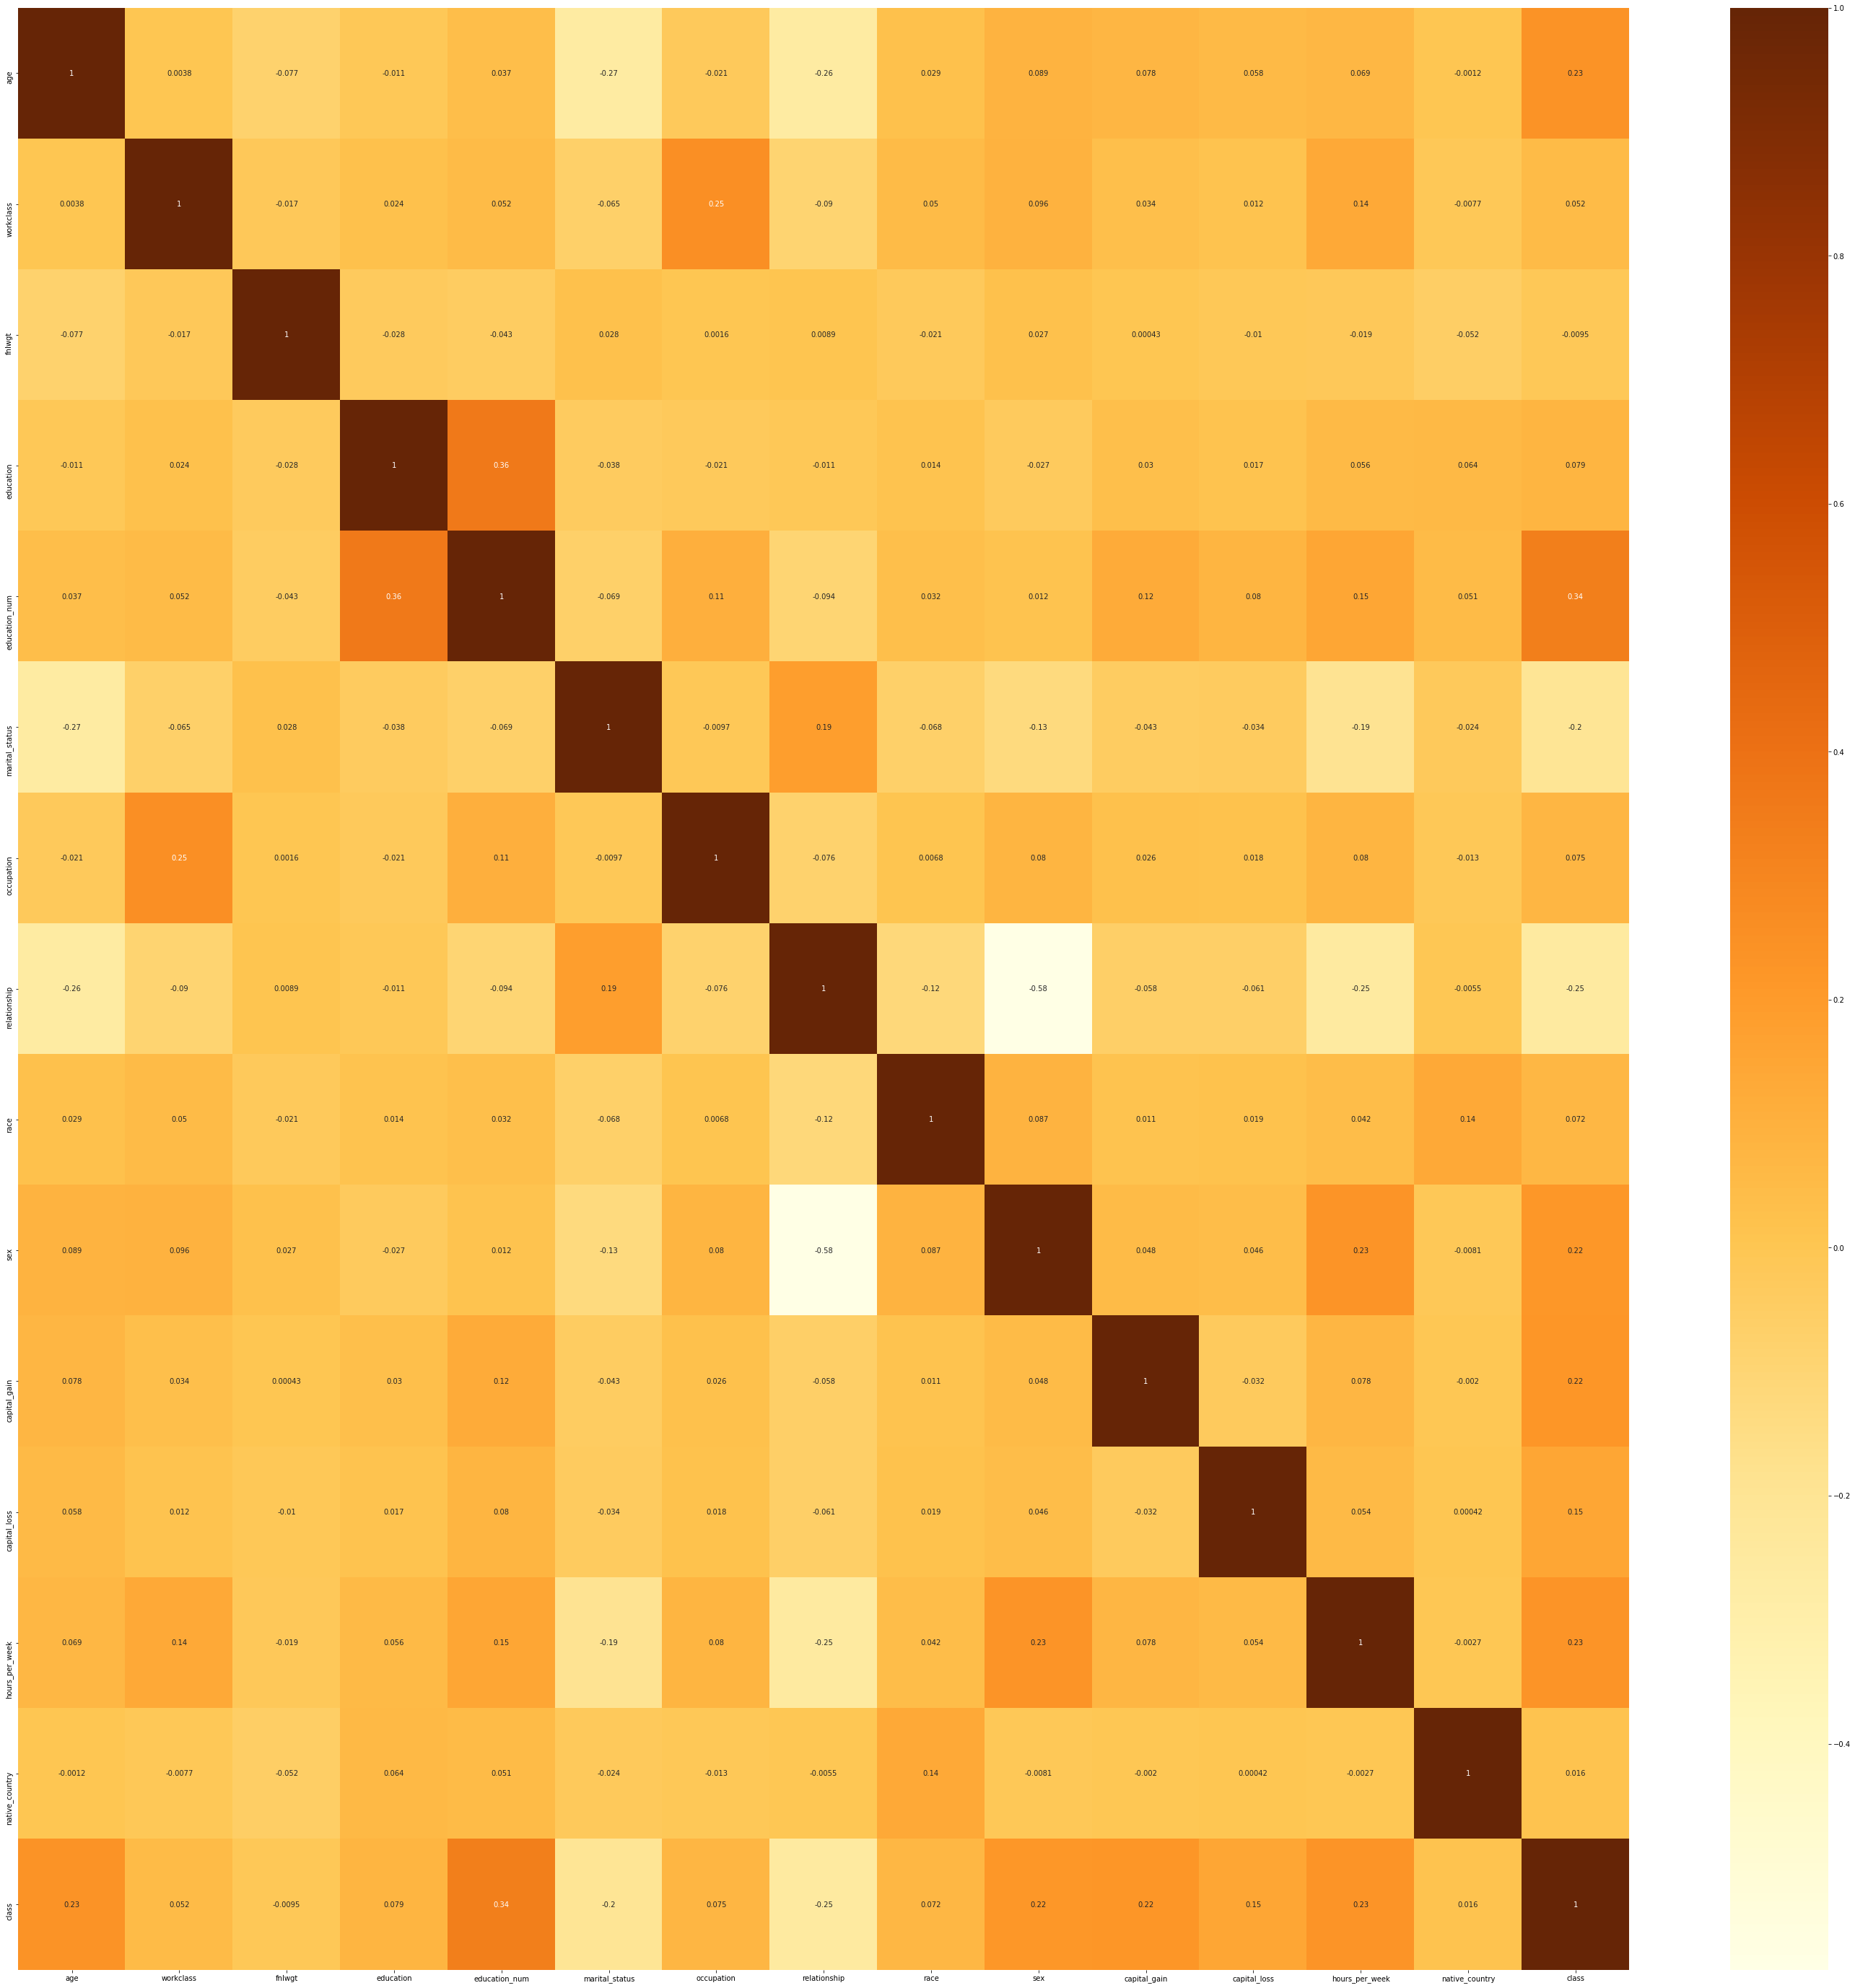

In [17]:
fig, ax = plt.subplots(figsize=(50,50))
df1_corr_mat = df1.corr()
sns.heatmap(df1_corr_mat, annot=True, cmap='YlOrBr');

### Class vs Sex

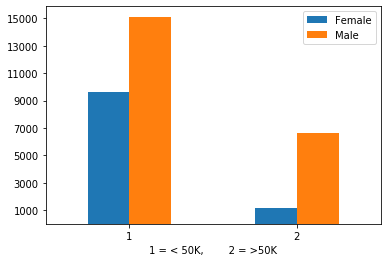

In [10]:
class_sex = pd.crosstab(df1['class'], df1['sex'])
class_sex.plot(kind='bar')
plt.legend(['Female', 'Male'])
plt.xlabel('1 = < 50K,        2 = >50K')
plt.xticks(rotation=0)
plt.yticks(np.arange(1000,17000,2000));

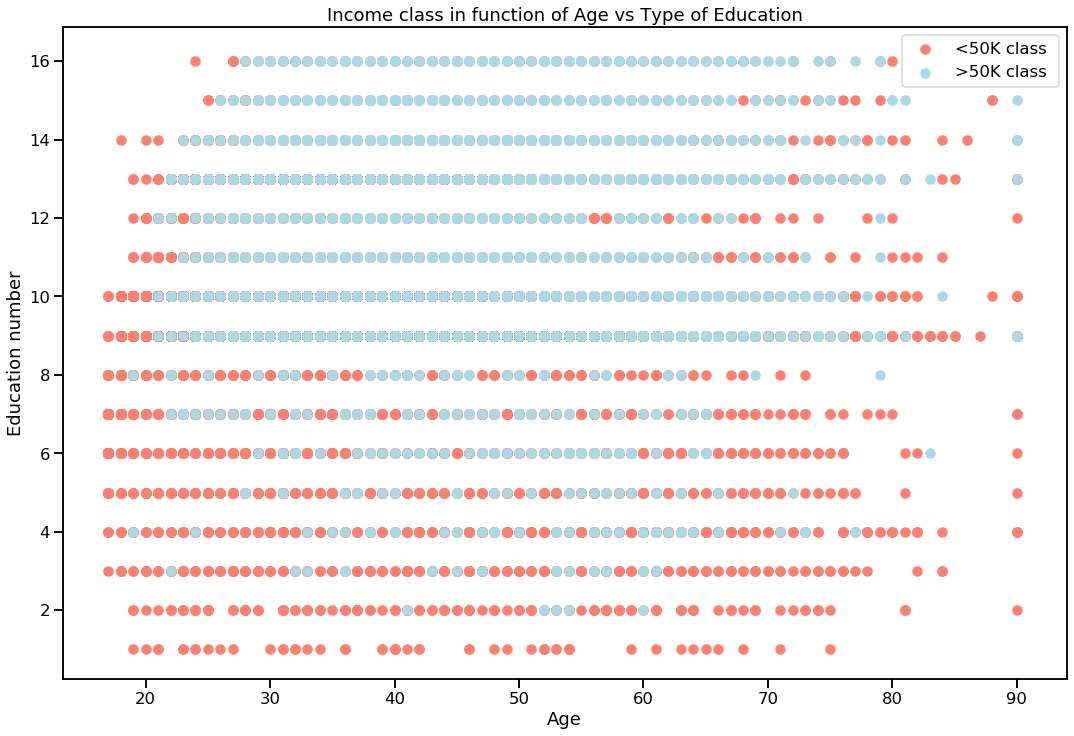

In [70]:
# Create a scatter plot where Age and Type of Education are linked with the 2 different labels (<50K and >50K)
plt.figure(figsize=(18,12))

# Scatter with positive examples
plt.scatter(df1.age[df1['class'] == 1],               # represents age values with class =1 (<50K)
           df1['education_num'][df1['class'] == 1],   # represents education values with target=1
           c='salmon')

# Scatter with negative examples
plt.scatter(df1.age[df1['class'] == 2],
           df1['education_num'][df1['class'] == 2],
           c='lightblue')

plt.title('Income class in function of Age vs Type of Education')
plt.xlabel('Age')
plt.ylabel('Education number')
plt.legend(['<50K class ', '>50K class']);

## Modelling

In [18]:
# Split the data into X and y
X = df1.drop('class', axis=1)
y =df1['class']

X.shape, y.shape

((32561, 14), (32561,))

In [19]:
# Split the data into training and validation
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

### What's going to happen next?

1. Find the right estimator
    * Logistic Regression
    * K Nearest Neighbors
    * Randomm Forest Classifier
    * XGBoost Classifier
    * CatBoost Classifier
    
    
2. Train and test them

3. Compare results

In [20]:
# Organize all models inside a dictionary

models = {'Logistic Regression': LogisticRegression(max_iter=300),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression(),
          'XGBoost': XGBClassifier(),
          'CatBoost': CatBoostClassifier()}

# Create a function which Fits and Scores all models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates different learning models
    models: estimators dictionary
    X_train: training data without labels
    X_test: test data without labels
    y_train: train set labels
    y_test: test set labels
    """
    # Set a random seed
    np.random.seed(42)
    
    # Create an empty dictionary
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate model and append the results to the empty dictionary
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [21]:
%%time
fit_and_score(models=models,
             X_train = X_train,
             X_test=X_test,
             y_train=y_train,
             y_test=y_test)

Learning rate set to 0.041445
0:	learn: 0.6515160	total: 531ms	remaining: 8m 50s
1:	learn: 0.6160494	total: 626ms	remaining: 5m 12s
2:	learn: 0.5822602	total: 691ms	remaining: 3m 49s
3:	learn: 0.5549684	total: 754ms	remaining: 3m 7s
4:	learn: 0.5291626	total: 812ms	remaining: 2m 41s
5:	learn: 0.5064776	total: 893ms	remaining: 2m 27s
6:	learn: 0.4870616	total: 1.16s	remaining: 2m 44s
7:	learn: 0.4692849	total: 1.26s	remaining: 2m 36s
8:	learn: 0.4540481	total: 1.49s	remaining: 2m 44s
9:	learn: 0.4412105	total: 1.62s	remaining: 2m 40s
10:	learn: 0.4318288	total: 1.79s	remaining: 2m 40s
11:	learn: 0.4224570	total: 2.08s	remaining: 2m 51s
12:	learn: 0.4135367	total: 2.15s	remaining: 2m 43s
13:	learn: 0.4030264	total: 2.21s	remaining: 2m 35s
14:	learn: 0.3945424	total: 2.4s	remaining: 2m 37s
15:	learn: 0.3883672	total: 2.56s	remaining: 2m 37s
16:	learn: 0.3833494	total: 2.88s	remaining: 2m 46s
17:	learn: 0.3784770	total: 2.94s	remaining: 2m 40s
18:	learn: 0.3738146	total: 3.05s	remaining: 2

158:	learn: 0.2857908	total: 12.7s	remaining: 1m 7s
159:	learn: 0.2856417	total: 12.7s	remaining: 1m 6s
160:	learn: 0.2855271	total: 12.8s	remaining: 1m 6s
161:	learn: 0.2853697	total: 12.8s	remaining: 1m 6s
162:	learn: 0.2852428	total: 12.8s	remaining: 1m 5s
163:	learn: 0.2851771	total: 12.9s	remaining: 1m 5s
164:	learn: 0.2850932	total: 12.9s	remaining: 1m 5s
165:	learn: 0.2850258	total: 13s	remaining: 1m 5s
166:	learn: 0.2849362	total: 13s	remaining: 1m 4s
167:	learn: 0.2847424	total: 13s	remaining: 1m 4s
168:	learn: 0.2845943	total: 13.1s	remaining: 1m 4s
169:	learn: 0.2844731	total: 13.1s	remaining: 1m 3s
170:	learn: 0.2843792	total: 13.1s	remaining: 1m 3s
171:	learn: 0.2842182	total: 13.2s	remaining: 1m 3s
172:	learn: 0.2841312	total: 13.2s	remaining: 1m 3s
173:	learn: 0.2839674	total: 13.2s	remaining: 1m 2s
174:	learn: 0.2837796	total: 13.3s	remaining: 1m 2s
175:	learn: 0.2836438	total: 13.3s	remaining: 1m 2s
176:	learn: 0.2834923	total: 13.4s	remaining: 1m 2s
177:	learn: 0.2833

320:	learn: 0.2661576	total: 19.2s	remaining: 40.7s
321:	learn: 0.2660648	total: 19.3s	remaining: 40.5s
322:	learn: 0.2659756	total: 19.3s	remaining: 40.4s
323:	learn: 0.2658904	total: 19.3s	remaining: 40.3s
324:	learn: 0.2658009	total: 19.4s	remaining: 40.2s
325:	learn: 0.2657169	total: 19.4s	remaining: 40.1s
326:	learn: 0.2656564	total: 19.4s	remaining: 40s
327:	learn: 0.2655716	total: 19.5s	remaining: 39.9s
328:	learn: 0.2654869	total: 19.5s	remaining: 39.8s
329:	learn: 0.2654015	total: 19.5s	remaining: 39.7s
330:	learn: 0.2653296	total: 19.6s	remaining: 39.6s
331:	learn: 0.2653136	total: 19.6s	remaining: 39.5s
332:	learn: 0.2652281	total: 19.6s	remaining: 39.4s
333:	learn: 0.2651535	total: 19.7s	remaining: 39.2s
334:	learn: 0.2650746	total: 19.7s	remaining: 39.1s
335:	learn: 0.2649872	total: 19.8s	remaining: 39s
336:	learn: 0.2649036	total: 19.8s	remaining: 38.9s
337:	learn: 0.2648268	total: 19.8s	remaining: 38.8s
338:	learn: 0.2647647	total: 19.9s	remaining: 38.7s
339:	learn: 0.26

480:	learn: 0.2549664	total: 25.5s	remaining: 27.5s
481:	learn: 0.2549110	total: 25.5s	remaining: 27.4s
482:	learn: 0.2548035	total: 25.6s	remaining: 27.4s
483:	learn: 0.2547417	total: 25.6s	remaining: 27.3s
484:	learn: 0.2546886	total: 25.6s	remaining: 27.2s
485:	learn: 0.2546051	total: 25.7s	remaining: 27.1s
486:	learn: 0.2545392	total: 25.7s	remaining: 27.1s
487:	learn: 0.2544942	total: 25.7s	remaining: 27s
488:	learn: 0.2544512	total: 25.8s	remaining: 26.9s
489:	learn: 0.2543778	total: 25.8s	remaining: 26.9s
490:	learn: 0.2543594	total: 25.9s	remaining: 26.8s
491:	learn: 0.2543090	total: 25.9s	remaining: 26.7s
492:	learn: 0.2542497	total: 25.9s	remaining: 26.7s
493:	learn: 0.2541757	total: 26s	remaining: 26.6s
494:	learn: 0.2541223	total: 26s	remaining: 26.5s
495:	learn: 0.2540390	total: 26.1s	remaining: 26.5s
496:	learn: 0.2539811	total: 26.1s	remaining: 26.4s
497:	learn: 0.2539271	total: 26.1s	remaining: 26.3s
498:	learn: 0.2538403	total: 26.2s	remaining: 26.3s
499:	learn: 0.2537

640:	learn: 0.2460017	total: 31.9s	remaining: 17.9s
641:	learn: 0.2459625	total: 31.9s	remaining: 17.8s
642:	learn: 0.2458853	total: 31.9s	remaining: 17.7s
643:	learn: 0.2458753	total: 32s	remaining: 17.7s
644:	learn: 0.2458269	total: 32s	remaining: 17.6s
645:	learn: 0.2457780	total: 32.1s	remaining: 17.6s
646:	learn: 0.2457347	total: 32.1s	remaining: 17.5s
647:	learn: 0.2456655	total: 32.1s	remaining: 17.5s
648:	learn: 0.2456296	total: 32.2s	remaining: 17.4s
649:	learn: 0.2456095	total: 32.2s	remaining: 17.3s
650:	learn: 0.2455670	total: 32.2s	remaining: 17.3s
651:	learn: 0.2455354	total: 32.3s	remaining: 17.2s
652:	learn: 0.2454691	total: 32.3s	remaining: 17.2s
653:	learn: 0.2454177	total: 32.3s	remaining: 17.1s
654:	learn: 0.2453842	total: 32.4s	remaining: 17.1s
655:	learn: 0.2453324	total: 32.4s	remaining: 17s
656:	learn: 0.2452789	total: 32.4s	remaining: 16.9s
657:	learn: 0.2452627	total: 32.5s	remaining: 16.9s
658:	learn: 0.2452121	total: 32.5s	remaining: 16.8s
659:	learn: 0.2451

802:	learn: 0.2387817	total: 38.2s	remaining: 9.37s
803:	learn: 0.2387384	total: 38.2s	remaining: 9.32s
804:	learn: 0.2387232	total: 38.3s	remaining: 9.27s
805:	learn: 0.2386460	total: 38.3s	remaining: 9.22s
806:	learn: 0.2385925	total: 38.3s	remaining: 9.17s
807:	learn: 0.2385421	total: 38.4s	remaining: 9.12s
808:	learn: 0.2385360	total: 38.4s	remaining: 9.07s
809:	learn: 0.2384963	total: 38.5s	remaining: 9.02s
810:	learn: 0.2384692	total: 38.5s	remaining: 8.97s
811:	learn: 0.2384302	total: 38.5s	remaining: 8.92s
812:	learn: 0.2383967	total: 38.6s	remaining: 8.87s
813:	learn: 0.2383440	total: 38.6s	remaining: 8.82s
814:	learn: 0.2383003	total: 38.6s	remaining: 8.77s
815:	learn: 0.2382141	total: 38.7s	remaining: 8.72s
816:	learn: 0.2381480	total: 38.7s	remaining: 8.67s
817:	learn: 0.2381246	total: 38.8s	remaining: 8.62s
818:	learn: 0.2380751	total: 38.8s	remaining: 8.57s
819:	learn: 0.2380645	total: 38.8s	remaining: 8.52s
820:	learn: 0.2380336	total: 38.9s	remaining: 8.47s
821:	learn: 

963:	learn: 0.2315982	total: 46.8s	remaining: 1.75s
964:	learn: 0.2315524	total: 47s	remaining: 1.7s
965:	learn: 0.2314967	total: 47.3s	remaining: 1.66s
966:	learn: 0.2314420	total: 47.4s	remaining: 1.62s
967:	learn: 0.2314153	total: 47.5s	remaining: 1.57s
968:	learn: 0.2313609	total: 47.5s	remaining: 1.52s
969:	learn: 0.2313244	total: 47.6s	remaining: 1.47s
970:	learn: 0.2312812	total: 47.7s	remaining: 1.42s
971:	learn: 0.2312554	total: 47.8s	remaining: 1.38s
972:	learn: 0.2312272	total: 47.9s	remaining: 1.33s
973:	learn: 0.2311995	total: 47.9s	remaining: 1.28s
974:	learn: 0.2311550	total: 48s	remaining: 1.23s
975:	learn: 0.2311074	total: 48s	remaining: 1.18s
976:	learn: 0.2310437	total: 48.1s	remaining: 1.13s
977:	learn: 0.2310102	total: 48.1s	remaining: 1.08s
978:	learn: 0.2309664	total: 48.2s	remaining: 1.03s
979:	learn: 0.2309451	total: 48.2s	remaining: 984ms
980:	learn: 0.2309218	total: 48.2s	remaining: 934ms
981:	learn: 0.2308589	total: 48.3s	remaining: 885ms
982:	learn: 0.23081

{'Logistic Regression': 0.7941040994933211,
 'KNN': 0.7762935667127284,
 'Random Forest': 0.8610471364962383,
 'XGBoost': 0.8696453247351451,
 'CatBoost': 0.8724090280976509}

### Model comparison

Let's put the results into a DF and then plot them on a Barplot

In [22]:
%%time
model_scores = fit_and_score(models=models,
                                 X_train = X_train,
                                 X_test=X_test,
                                 y_train=y_train,
                                 y_test=y_test)

Learning rate set to 0.041445
0:	learn: 0.6515160	total: 58.8ms	remaining: 58.7s
1:	learn: 0.6160494	total: 114ms	remaining: 56.8s
2:	learn: 0.5822602	total: 168ms	remaining: 56s
3:	learn: 0.5549684	total: 225ms	remaining: 56s
4:	learn: 0.5291626	total: 275ms	remaining: 54.7s
5:	learn: 0.5064776	total: 329ms	remaining: 54.4s
6:	learn: 0.4870616	total: 386ms	remaining: 54.7s
7:	learn: 0.4692849	total: 431ms	remaining: 53.4s
8:	learn: 0.4540481	total: 472ms	remaining: 52s
9:	learn: 0.4412105	total: 519ms	remaining: 51.4s
10:	learn: 0.4318288	total: 574ms	remaining: 51.6s
11:	learn: 0.4224570	total: 622ms	remaining: 51.2s
12:	learn: 0.4135367	total: 662ms	remaining: 50.3s
13:	learn: 0.4030264	total: 705ms	remaining: 49.7s
14:	learn: 0.3945424	total: 748ms	remaining: 49.1s
15:	learn: 0.3883672	total: 789ms	remaining: 48.5s
16:	learn: 0.3833494	total: 830ms	remaining: 48s
17:	learn: 0.3784770	total: 869ms	remaining: 47.4s
18:	learn: 0.3738146	total: 910ms	remaining: 47s
19:	learn: 0.3695184

163:	learn: 0.2851771	total: 9.36s	remaining: 47.7s
164:	learn: 0.2850932	total: 9.39s	remaining: 47.5s
165:	learn: 0.2850258	total: 9.43s	remaining: 47.4s
166:	learn: 0.2849362	total: 9.46s	remaining: 47.2s
167:	learn: 0.2847424	total: 9.5s	remaining: 47s
168:	learn: 0.2845943	total: 9.55s	remaining: 46.9s
169:	learn: 0.2844731	total: 9.59s	remaining: 46.8s
170:	learn: 0.2843792	total: 9.63s	remaining: 46.7s
171:	learn: 0.2842182	total: 9.67s	remaining: 46.5s
172:	learn: 0.2841312	total: 9.71s	remaining: 46.4s
173:	learn: 0.2839674	total: 9.74s	remaining: 46.3s
174:	learn: 0.2837796	total: 9.79s	remaining: 46.1s
175:	learn: 0.2836438	total: 9.83s	remaining: 46s
176:	learn: 0.2834923	total: 9.87s	remaining: 45.9s
177:	learn: 0.2833867	total: 9.91s	remaining: 45.8s
178:	learn: 0.2832850	total: 9.95s	remaining: 45.6s
179:	learn: 0.2831416	total: 9.98s	remaining: 45.5s
180:	learn: 0.2830165	total: 10.1s	remaining: 45.5s
181:	learn: 0.2828891	total: 10.2s	remaining: 46s
182:	learn: 0.28283

326:	learn: 0.2656564	total: 18.3s	remaining: 37.6s
327:	learn: 0.2655716	total: 18.3s	remaining: 37.5s
328:	learn: 0.2654869	total: 18.4s	remaining: 37.5s
329:	learn: 0.2654015	total: 18.4s	remaining: 37.4s
330:	learn: 0.2653296	total: 18.4s	remaining: 37.3s
331:	learn: 0.2653136	total: 18.5s	remaining: 37.2s
332:	learn: 0.2652281	total: 18.5s	remaining: 37.1s
333:	learn: 0.2651535	total: 18.6s	remaining: 37s
334:	learn: 0.2650746	total: 18.6s	remaining: 36.9s
335:	learn: 0.2649872	total: 18.6s	remaining: 36.9s
336:	learn: 0.2649036	total: 18.7s	remaining: 36.8s
337:	learn: 0.2648268	total: 18.7s	remaining: 36.7s
338:	learn: 0.2647647	total: 18.8s	remaining: 36.6s
339:	learn: 0.2646439	total: 18.8s	remaining: 36.5s
340:	learn: 0.2645904	total: 18.8s	remaining: 36.4s
341:	learn: 0.2645164	total: 18.9s	remaining: 36.3s
342:	learn: 0.2644268	total: 18.9s	remaining: 36.3s
343:	learn: 0.2643503	total: 19s	remaining: 36.2s
344:	learn: 0.2642658	total: 19.1s	remaining: 36.2s
345:	learn: 0.26

487:	learn: 0.2544942	total: 25.6s	remaining: 26.9s
488:	learn: 0.2544512	total: 25.7s	remaining: 26.8s
489:	learn: 0.2543778	total: 25.8s	remaining: 26.8s
490:	learn: 0.2543594	total: 25.9s	remaining: 26.8s
491:	learn: 0.2543090	total: 25.9s	remaining: 26.8s
492:	learn: 0.2542497	total: 26s	remaining: 26.7s
493:	learn: 0.2541757	total: 26s	remaining: 26.6s
494:	learn: 0.2541223	total: 26s	remaining: 26.6s
495:	learn: 0.2540390	total: 26.1s	remaining: 26.5s
496:	learn: 0.2539811	total: 26.1s	remaining: 26.4s
497:	learn: 0.2539271	total: 26.2s	remaining: 26.4s
498:	learn: 0.2538403	total: 26.2s	remaining: 26.3s
499:	learn: 0.2537907	total: 26.3s	remaining: 26.3s
500:	learn: 0.2537174	total: 26.3s	remaining: 26.2s
501:	learn: 0.2536725	total: 26.4s	remaining: 26.1s
502:	learn: 0.2536140	total: 26.4s	remaining: 26.1s
503:	learn: 0.2535349	total: 26.4s	remaining: 26s
504:	learn: 0.2534923	total: 26.5s	remaining: 25.9s
505:	learn: 0.2534394	total: 26.5s	remaining: 25.9s
506:	learn: 0.253371

647:	learn: 0.2456655	total: 33.1s	remaining: 18s
648:	learn: 0.2456296	total: 33.2s	remaining: 17.9s
649:	learn: 0.2456095	total: 33.2s	remaining: 17.9s
650:	learn: 0.2455670	total: 33.2s	remaining: 17.8s
651:	learn: 0.2455354	total: 33.3s	remaining: 17.8s
652:	learn: 0.2454691	total: 33.3s	remaining: 17.7s
653:	learn: 0.2454177	total: 33.4s	remaining: 17.7s
654:	learn: 0.2453842	total: 33.4s	remaining: 17.6s
655:	learn: 0.2453324	total: 33.4s	remaining: 17.5s
656:	learn: 0.2452789	total: 33.5s	remaining: 17.5s
657:	learn: 0.2452627	total: 33.5s	remaining: 17.4s
658:	learn: 0.2452121	total: 33.6s	remaining: 17.4s
659:	learn: 0.2451774	total: 33.6s	remaining: 17.3s
660:	learn: 0.2451254	total: 33.7s	remaining: 17.3s
661:	learn: 0.2450771	total: 33.7s	remaining: 17.2s
662:	learn: 0.2450299	total: 33.8s	remaining: 17.2s
663:	learn: 0.2449977	total: 33.8s	remaining: 17.1s
664:	learn: 0.2449630	total: 33.9s	remaining: 17.1s
665:	learn: 0.2449205	total: 33.9s	remaining: 17s
666:	learn: 0.24

808:	learn: 0.2385360	total: 41.1s	remaining: 9.71s
809:	learn: 0.2384963	total: 41.2s	remaining: 9.67s
810:	learn: 0.2384692	total: 41.3s	remaining: 9.62s
811:	learn: 0.2384302	total: 41.4s	remaining: 9.58s
812:	learn: 0.2383967	total: 41.6s	remaining: 9.57s
813:	learn: 0.2383440	total: 41.8s	remaining: 9.55s
814:	learn: 0.2383003	total: 42s	remaining: 9.52s
815:	learn: 0.2382141	total: 42s	remaining: 9.47s
816:	learn: 0.2381480	total: 42.1s	remaining: 9.42s
817:	learn: 0.2381246	total: 42.1s	remaining: 9.37s
818:	learn: 0.2380751	total: 42.1s	remaining: 9.31s
819:	learn: 0.2380645	total: 42.2s	remaining: 9.26s
820:	learn: 0.2380336	total: 42.2s	remaining: 9.21s
821:	learn: 0.2379905	total: 42.3s	remaining: 9.15s
822:	learn: 0.2379378	total: 42.3s	remaining: 9.1s
823:	learn: 0.2379132	total: 42.4s	remaining: 9.05s
824:	learn: 0.2378714	total: 42.4s	remaining: 9s
825:	learn: 0.2377868	total: 42.5s	remaining: 8.94s
826:	learn: 0.2377042	total: 42.5s	remaining: 8.89s
827:	learn: 0.237656

967:	learn: 0.2314153	total: 50.9s	remaining: 1.68s
968:	learn: 0.2313609	total: 50.9s	remaining: 1.63s
969:	learn: 0.2313244	total: 50.9s	remaining: 1.57s
970:	learn: 0.2312812	total: 51s	remaining: 1.52s
971:	learn: 0.2312554	total: 51s	remaining: 1.47s
972:	learn: 0.2312272	total: 51.1s	remaining: 1.42s
973:	learn: 0.2311995	total: 51.1s	remaining: 1.36s
974:	learn: 0.2311550	total: 51.2s	remaining: 1.31s
975:	learn: 0.2311074	total: 51.2s	remaining: 1.26s
976:	learn: 0.2310437	total: 51.3s	remaining: 1.21s
977:	learn: 0.2310102	total: 51.3s	remaining: 1.15s
978:	learn: 0.2309664	total: 51.4s	remaining: 1.1s
979:	learn: 0.2309451	total: 51.4s	remaining: 1.05s
980:	learn: 0.2309218	total: 51.4s	remaining: 996ms
981:	learn: 0.2308589	total: 51.5s	remaining: 944ms
982:	learn: 0.2308191	total: 51.6s	remaining: 892ms
983:	learn: 0.2307521	total: 51.6s	remaining: 839ms
984:	learn: 0.2306929	total: 51.7s	remaining: 787ms
985:	learn: 0.2306366	total: 51.7s	remaining: 734ms
986:	learn: 0.230

                     Accuracy
Logistic Regression  0.794104
KNN                  0.776294
Random Forest        0.861047
XGBoost              0.869645
CatBoost             0.872409


<Figure size 432x1080 with 0 Axes>

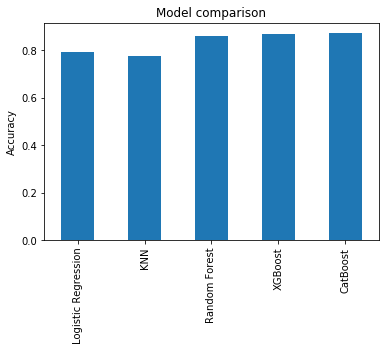

In [24]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
print(model_compare.T)
plt.figure(figsize=(6,15))
model_compare.T.plot(kind='bar', 
                    title='Model comparison',
                    legend=False, )
plt.ylabel('Accuracy');

The results obtained from the `fit_and_score` function plus the visualization on the barplot confirmed that best performancing models are the RandomForestClassifier with the other two tree based models XGBoost and CatBoost. Therefore next steps in our analysis will be the following:

* **Hyperparameter tuning**

* **Metrics Evaluation:** Confusion Matrix, Cross-Validation, Precision, Recall, F1 Score, Classification Report, ROC Curve and Area under the curve (AUC)

* **Feature importance**

### Hyperparameters tuning with RandomizedSearchCV

* Random Forest Classifier

* XGBoost Classifier

* CatBoost Classifier

In [33]:
# Create the grids for all the estimators

xgb_grid = {'min_child_weight': np.arange(1,10,2),
           'max_depth': np.arange(3,13,3),
            'learning_rate': [0.1, 0.5, 0.3],
            'gamma': [0, 0.1, 0.2],
            'n_estimators': [1000, 1200],
            'subsample': [0.5, 1],
            'colsample_bytree': [0.5, 1]}

cat_grid = {'iterations': [100],
           'learning_rate': [0.1, 0.3],
           'depth': np.arange(4, 8, 16),
           'grow_policy': ['Depthwise', 'Lossguide'],
            'max_leaves': [20, 40]
           }

#### XGBoost

In [26]:
np.random.seed(42)

rs_xgb = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=xgb_grid,
                           cv=3,
                           verbose=True,
                           n_jobs=-1)

rs_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 1],
                                        'gamma': [0

In [27]:
rs_xgb.best_params_

{'subsample': 0.5,
 'n_estimators': 1200,
 'min_child_weight': 9,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 1}

In [28]:
rs_xgb.score(X_test, y_test)

0.860586519269154

#### CatBoost RandomizedSearchCV

In [34]:
# Set a random seed
np.random.seed(42)

# Insatntiate the model
rs_cat = RandomizedSearchCV(CatBoostClassifier(),
                           param_distributions=cat_grid,
                           cv=5,
                           verbose=True,
                           n_jobs=-1)
# Fit the RandomizedSearchCV
rs_cat.fit(X_train, y_train)

C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


0:	learn: 0.5558527	total: 28.3ms	remaining: 2.8s
1:	learn: 0.4780346	total: 59.7ms	remaining: 2.92s
2:	learn: 0.4348950	total: 81.8ms	remaining: 2.65s
3:	learn: 0.4026175	total: 104ms	remaining: 2.51s
4:	learn: 0.3796402	total: 208ms	remaining: 3.94s
5:	learn: 0.3622990	total: 243ms	remaining: 3.81s
6:	learn: 0.3495404	total: 383ms	remaining: 5.09s
7:	learn: 0.3406981	total: 454ms	remaining: 5.22s
8:	learn: 0.3345925	total: 483ms	remaining: 4.88s
9:	learn: 0.3290478	total: 510ms	remaining: 4.59s
10:	learn: 0.3222690	total: 549ms	remaining: 4.44s
11:	learn: 0.3192581	total: 575ms	remaining: 4.21s
12:	learn: 0.3157304	total: 605ms	remaining: 4.05s
13:	learn: 0.3117363	total: 630ms	remaining: 3.87s
14:	learn: 0.3090845	total: 658ms	remaining: 3.73s
15:	learn: 0.3072724	total: 686ms	remaining: 3.6s
16:	learn: 0.3058049	total: 719ms	remaining: 3.51s
17:	learn: 0.3047070	total: 759ms	remaining: 3.46s
18:	learn: 0.3031172	total: 804ms	remaining: 3.43s
19:	learn: 0.3014396	total: 838ms	remain

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000021551044250>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'depth': array([4]),
                                        'grow_policy': ['Depthwise',
                                                        'Lossguide'],
                                        'iterations': [100],
                                        'learning_rate': [0.1, 0.3],
                                        'max_leaves': [20, 40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [35]:
rs_cat.best_params_

{'max_leaves': 20,
 'learning_rate': 0.3,
 'iterations': 100,
 'grow_policy': 'Lossguide',
 'depth': 4}

In [36]:
rs_cat.score(X_train, y_train)

0.8789158476658476

                    XGBoost  CatBoost
RandomizedSearchCV    86.06     87.89


<Figure size 360x864 with 0 Axes>

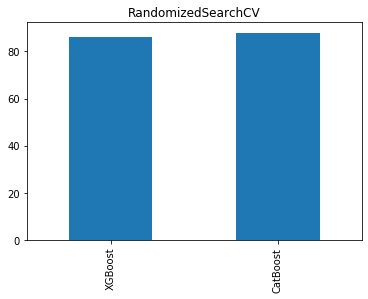

In [37]:
rs_scores = {'XGBoost': round(rs_xgb.score(X_test, y_test), 4)*100,
            'CatBoost': round(rs_cat.score(X_train, y_train), 4)*100}
compare_rs = pd.DataFrame(data=rs_scores, index=['RandomizedSearchCV'])
print(compare_rs)

plt.figure(figsize=(5,12))
compare_rs.T.plot(kind='bar', legend=False, title='RandomizedSearchCV');

So far the best result is from the CabBoost Classifier; hence this will be the estimator we are going to tune next using a deeper GridSearchCV.

#### CatBoost GridSearchCV 

In [62]:
# Setup random seed
np.random.seed(42)

# Create a GridSearchCV grid
gs_grid = {'max_leaves': [40,60],
 'learning_rate': [ 0.3, 0.1],
 'iterations': [100,200],
 'grow_policy': ['Lossguide'],
 'depth': [4]}

# Instantiate the model
gs_cat = GridSearchCV(CatBoostClassifier(),
                     param_grid=gs_grid,
                     n_jobs=-1,
                     cv=5,
                     verbose=True)

# Fit the GridSearchCV model
gs_cat.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.1min finished


0:	learn: 0.6115902	total: 178ms	remaining: 35.5s
1:	learn: 0.5517246	total: 220ms	remaining: 21.8s
2:	learn: 0.5009342	total: 265ms	remaining: 17.4s
3:	learn: 0.4679463	total: 309ms	remaining: 15.1s
4:	learn: 0.4437039	total: 362ms	remaining: 14.1s
5:	learn: 0.4264742	total: 456ms	remaining: 14.8s
6:	learn: 0.4113178	total: 501ms	remaining: 13.8s
7:	learn: 0.3956087	total: 543ms	remaining: 13s
8:	learn: 0.3826917	total: 596ms	remaining: 12.6s
9:	learn: 0.3725545	total: 667ms	remaining: 12.7s
10:	learn: 0.3650114	total: 711ms	remaining: 12.2s
11:	learn: 0.3600018	total: 756ms	remaining: 11.8s
12:	learn: 0.3542223	total: 802ms	remaining: 11.5s
13:	learn: 0.3494071	total: 871ms	remaining: 11.6s
14:	learn: 0.3438856	total: 916ms	remaining: 11.3s
15:	learn: 0.3390999	total: 961ms	remaining: 11.1s
16:	learn: 0.3359278	total: 1.01s	remaining: 10.8s
17:	learn: 0.3322167	total: 1.08s	remaining: 10.9s
18:	learn: 0.3291593	total: 1.13s	remaining: 10.7s
19:	learn: 0.3268019	total: 1.17s	remaining

162:	learn: 0.2644704	total: 9.31s	remaining: 2.11s
163:	learn: 0.2642965	total: 9.38s	remaining: 2.06s
164:	learn: 0.2642771	total: 9.43s	remaining: 2s
165:	learn: 0.2640857	total: 9.47s	remaining: 1.94s
166:	learn: 0.2639440	total: 9.53s	remaining: 1.88s
167:	learn: 0.2637484	total: 9.59s	remaining: 1.82s
168:	learn: 0.2635265	total: 9.64s	remaining: 1.77s
169:	learn: 0.2632310	total: 9.68s	remaining: 1.71s
170:	learn: 0.2630471	total: 9.73s	remaining: 1.65s
171:	learn: 0.2628618	total: 9.79s	remaining: 1.59s
172:	learn: 0.2624927	total: 9.84s	remaining: 1.53s
173:	learn: 0.2622729	total: 9.88s	remaining: 1.48s
174:	learn: 0.2620660	total: 9.93s	remaining: 1.42s
175:	learn: 0.2618000	total: 9.99s	remaining: 1.36s
176:	learn: 0.2617841	total: 10s	remaining: 1.3s
177:	learn: 0.2616213	total: 10.1s	remaining: 1.25s
178:	learn: 0.2613362	total: 10.1s	remaining: 1.19s
179:	learn: 0.2612763	total: 10.2s	remaining: 1.13s
180:	learn: 0.2611346	total: 10.3s	remaining: 1.08s
181:	learn: 0.2609

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017E536260D0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [4], 'grow_policy': ['Lossguide'],
                         'iterations': [100, 200], 'learning_rate': [0.3, 0.1],
                         'max_leaves': [40, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [63]:
gs_cat.best_params_

{'depth': 4,
 'grow_policy': 'Lossguide',
 'iterations': 200,
 'learning_rate': 0.1,
 'max_leaves': 40}

In [64]:
gs_cat.score(X_test, y_test)

0.8713342545677875

## Evaluating tuned machine classifier, beyond accuracy

* ROC curve and AUC
* Confusion Matrix
* Classification Report
* Precision, Recall and F1 scores

... possibly using Cross Validitation where it's possible

First of all to make comparison and evaluate our trained model, we need to make predictions


In [67]:
# Make predictions with tuned model
y_preds = rs_cat.predict(X_test)
y_preds.shape

(6513,)

### ROC curve: comparing the true positive rates to false positive

* ROC curve is a performance measurement for classification problem at various thresholds settings.

* ROC is a probability curve and AUC represents degree or measure of separability. 

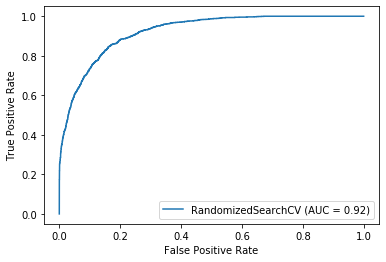

In [68]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_cat,
              X_test,
              y_test)

### Confusion matrix:

* it is a performance measurement for machine learning classification problem where output can be two or more classes.
* It is a table with 4 different combinations of predicted and actual values.

* **True Positive: Interpretation**: You predicted positive and it’s true.
* **True Negative: Interpretation**: You predicted negative and it’s true.
* **False Positive: (Type 1 Error) Interpretation**: You predicted positive and it’s false.
* **False Negative: (Type 2 Error) Interpretation**: You predicted negative and it’s false.

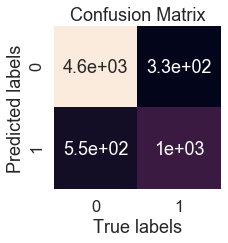

In [69]:
sns.set(font_scale=1.5)

# Create a function to plot a nice looking confusion matrix
def plot_conf_mat(y_tes, y_preds):
    """
    Plots a nice looking confusion matrix
    
    y_test: true data labels
    y_preds: predicted labels on X_test set
    
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.title('Confusion Matrix')

plot_conf_mat(y_test, y_preds)

Now that Confusion Matrix, ROC curve and AUC analysis are completed, the evaluation process can move on to Classification report. Precision, recall and F1 will be one by one examined  

### Classification Report

In [70]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.89      0.93      0.91      4965
           2       0.75      0.65      0.70      1548

    accuracy                           0.87      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.87      0.86      6513



* This classificationreport has been done only on 1 data test split 
* Therefore next step will be to consider each parameter individually on a multiple set of data (Cross VAlidation on 5 folds) 

### Calculate evaluation metrics using Cross Validation

* Calculate Precision, Recall and F1 score on a cross validate data set (using scoring parameter with 5 folds)

In [71]:
rs_cat.best_params_

{'max_leaves': 40,
 'learning_rate': 0.3,
 'iterations': 200,
 'grow_policy': 'Lossguide',
 'depth': 4}

In [72]:
best_model = CatBoostClassifier(max_leaves=40,
                                learning_rate=0.3,
                               iterations=200,
                                grow_policy='Lossguide',
                                depth=4)

In [74]:
# Cross Validated accuracy
cv_acc = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0:	learn: 0.4910390	total: 42.7ms	remaining: 8.5s
1:	learn: 0.4094957	total: 105ms	remaining: 10.4s
2:	learn: 0.3694131	total: 223ms	remaining: 14.6s
3:	learn: 0.3505391	total: 300ms	remaining: 14.7s
4:	learn: 0.3391372	total: 356ms	remaining: 13.9s
5:	learn: 0.3327239	total: 412ms	remaining: 13.3s
6:	learn: 0.3262649	total: 464ms	remaining: 12.8s
7:	learn: 0.3187783	total: 531ms	remaining: 12.8s
8:	learn: 0.3136945	total: 620ms	remaining: 13.2s
9:	learn: 0.3113021	total: 665ms	remaining: 12.6s
10:	learn: 0.3081480	total: 707ms	remaining: 12.1s
11:	learn: 0.3056354	total: 752ms	remaining: 11.8s
12:	learn: 0.3020594	total: 840ms	remaining: 12.1s
13:	learn: 0.2993112	total: 880ms	remaining: 11.7s
14:	learn: 0.2973829	total: 948ms	remaining: 11.7s
15:	learn: 0.2934693	total: 1.02s	remaining: 11.7s
16:	learn: 0.2924421	total: 1.08s	remaining: 11.7s
17:	learn: 0.2915134	total: 1.15s	remaining: 11.6s
18:	learn: 0.2903485	total: 1.27s	remaining: 12.1s
19:	learn: 0.2896061	total: 1.48s	remaini

162:	learn: 0.2288107	total: 11.1s	remaining: 2.52s
163:	learn: 0.2285343	total: 11.2s	remaining: 2.45s
164:	learn: 0.2284223	total: 11.3s	remaining: 2.4s
165:	learn: 0.2281667	total: 11.4s	remaining: 2.34s
166:	learn: 0.2278998	total: 11.5s	remaining: 2.26s
167:	learn: 0.2275107	total: 11.5s	remaining: 2.19s
168:	learn: 0.2272013	total: 11.6s	remaining: 2.12s
169:	learn: 0.2270592	total: 11.6s	remaining: 2.05s
170:	learn: 0.2269358	total: 11.7s	remaining: 1.98s
171:	learn: 0.2266104	total: 11.7s	remaining: 1.9s
172:	learn: 0.2263648	total: 11.8s	remaining: 1.84s
173:	learn: 0.2261102	total: 11.9s	remaining: 1.77s
174:	learn: 0.2258385	total: 11.9s	remaining: 1.71s
175:	learn: 0.2255843	total: 12s	remaining: 1.64s
176:	learn: 0.2252919	total: 12s	remaining: 1.56s
177:	learn: 0.2250407	total: 12.1s	remaining: 1.49s
178:	learn: 0.2247510	total: 12.2s	remaining: 1.43s
179:	learn: 0.2244622	total: 12.3s	remaining: 1.36s
180:	learn: 0.2243807	total: 12.4s	remaining: 1.3s
181:	learn: 0.22434

123:	learn: 0.2411942	total: 7.97s	remaining: 4.89s
124:	learn: 0.2408634	total: 8.05s	remaining: 4.83s
125:	learn: 0.2407461	total: 8.09s	remaining: 4.75s
126:	learn: 0.2404338	total: 8.13s	remaining: 4.67s
127:	learn: 0.2400488	total: 8.17s	remaining: 4.6s
128:	learn: 0.2396984	total: 8.24s	remaining: 4.53s
129:	learn: 0.2393968	total: 8.34s	remaining: 4.49s
130:	learn: 0.2392224	total: 8.48s	remaining: 4.47s
131:	learn: 0.2389273	total: 8.55s	remaining: 4.4s
132:	learn: 0.2388540	total: 8.61s	remaining: 4.33s
133:	learn: 0.2387392	total: 8.64s	remaining: 4.26s
134:	learn: 0.2385877	total: 8.75s	remaining: 4.21s
135:	learn: 0.2384826	total: 8.81s	remaining: 4.15s
136:	learn: 0.2383555	total: 8.87s	remaining: 4.08s
137:	learn: 0.2382372	total: 8.91s	remaining: 4s
138:	learn: 0.2381184	total: 8.95s	remaining: 3.92s
139:	learn: 0.2378536	total: 9.02s	remaining: 3.87s
140:	learn: 0.2375947	total: 9.07s	remaining: 3.8s
141:	learn: 0.2374298	total: 9.13s	remaining: 3.73s
142:	learn: 0.2371

87:	learn: 0.2508407	total: 6.34s	remaining: 8.07s
88:	learn: 0.2506509	total: 6.38s	remaining: 7.96s
89:	learn: 0.2501783	total: 6.42s	remaining: 7.85s
90:	learn: 0.2500411	total: 6.47s	remaining: 7.75s
91:	learn: 0.2495824	total: 6.53s	remaining: 7.67s
92:	learn: 0.2490950	total: 6.57s	remaining: 7.56s
93:	learn: 0.2488926	total: 6.61s	remaining: 7.45s
94:	learn: 0.2484046	total: 6.67s	remaining: 7.37s
95:	learn: 0.2481794	total: 6.74s	remaining: 7.3s
96:	learn: 0.2479094	total: 6.82s	remaining: 7.25s
97:	learn: 0.2474333	total: 6.87s	remaining: 7.14s
98:	learn: 0.2472361	total: 6.97s	remaining: 7.11s
99:	learn: 0.2471621	total: 7.01s	remaining: 7.01s
100:	learn: 0.2467285	total: 7.06s	remaining: 6.92s
101:	learn: 0.2464162	total: 7.14s	remaining: 6.86s
102:	learn: 0.2463307	total: 7.2s	remaining: 6.78s
103:	learn: 0.2461855	total: 7.25s	remaining: 6.69s
104:	learn: 0.2459343	total: 7.64s	remaining: 6.91s
105:	learn: 0.2456722	total: 7.8s	remaining: 6.92s
106:	learn: 0.2453904	total:

48:	learn: 0.2677664	total: 2.96s	remaining: 9.14s
49:	learn: 0.2667065	total: 3.12s	remaining: 9.36s
50:	learn: 0.2662464	total: 3.25s	remaining: 9.49s
51:	learn: 0.2654807	total: 3.3s	remaining: 9.4s
52:	learn: 0.2648874	total: 3.34s	remaining: 9.27s
53:	learn: 0.2641305	total: 3.38s	remaining: 9.14s
54:	learn: 0.2639816	total: 3.5s	remaining: 9.22s
55:	learn: 0.2633510	total: 3.57s	remaining: 9.17s
56:	learn: 0.2627696	total: 3.61s	remaining: 9.05s
57:	learn: 0.2623309	total: 3.68s	remaining: 9.02s
58:	learn: 0.2621535	total: 3.76s	remaining: 8.98s
59:	learn: 0.2616692	total: 3.83s	remaining: 8.93s
60:	learn: 0.2614644	total: 3.9s	remaining: 8.88s
61:	learn: 0.2608377	total: 3.95s	remaining: 8.79s
62:	learn: 0.2603753	total: 3.99s	remaining: 8.67s
63:	learn: 0.2600076	total: 4.03s	remaining: 8.56s
64:	learn: 0.2598489	total: 4.07s	remaining: 8.45s
65:	learn: 0.2593307	total: 4.11s	remaining: 8.35s
66:	learn: 0.2591688	total: 4.18s	remaining: 8.3s
67:	learn: 0.2586332	total: 4.22s	re

8:	learn: 0.3180068	total: 487ms	remaining: 10.3s
9:	learn: 0.3148788	total: 565ms	remaining: 10.7s
10:	learn: 0.3091801	total: 652ms	remaining: 11.2s
11:	learn: 0.3064734	total: 739ms	remaining: 11.6s
12:	learn: 0.3023545	total: 799ms	remaining: 11.5s
13:	learn: 0.3001431	total: 845ms	remaining: 11.2s
14:	learn: 0.2985010	total: 908ms	remaining: 11.2s
15:	learn: 0.2971947	total: 983ms	remaining: 11.3s
16:	learn: 0.2958124	total: 1.03s	remaining: 11.1s
17:	learn: 0.2948482	total: 1.11s	remaining: 11.2s
18:	learn: 0.2941997	total: 1.17s	remaining: 11.2s
19:	learn: 0.2923554	total: 1.24s	remaining: 11.2s
20:	learn: 0.2916510	total: 1.35s	remaining: 11.5s
21:	learn: 0.2881631	total: 1.51s	remaining: 12.2s
22:	learn: 0.2866951	total: 1.58s	remaining: 12.2s
23:	learn: 0.2860071	total: 1.62s	remaining: 11.9s
24:	learn: 0.2852350	total: 1.69s	remaining: 11.8s
25:	learn: 0.2848705	total: 1.77s	remaining: 11.9s
26:	learn: 0.2844211	total: 1.84s	remaining: 11.8s
27:	learn: 0.2837306	total: 1.89s

169:	learn: 0.2290105	total: 11.7s	remaining: 2.06s
170:	learn: 0.2285586	total: 11.7s	remaining: 1.99s
171:	learn: 0.2281991	total: 11.8s	remaining: 1.92s
172:	learn: 0.2279406	total: 11.9s	remaining: 1.85s
173:	learn: 0.2276911	total: 12s	remaining: 1.78s
174:	learn: 0.2275774	total: 12s	remaining: 1.71s
175:	learn: 0.2273200	total: 12.1s	remaining: 1.65s
176:	learn: 0.2270139	total: 12.2s	remaining: 1.58s
177:	learn: 0.2267032	total: 12.2s	remaining: 1.51s
178:	learn: 0.2264038	total: 12.2s	remaining: 1.44s
179:	learn: 0.2261705	total: 12.3s	remaining: 1.36s
180:	learn: 0.2259577	total: 12.3s	remaining: 1.29s
181:	learn: 0.2256149	total: 12.4s	remaining: 1.22s
182:	learn: 0.2254915	total: 12.4s	remaining: 1.15s
183:	learn: 0.2253312	total: 12.4s	remaining: 1.08s
184:	learn: 0.2251864	total: 12.5s	remaining: 1.01s
185:	learn: 0.2250303	total: 12.6s	remaining: 947ms
186:	learn: 0.2248906	total: 12.8s	remaining: 888ms
187:	learn: 0.2246735	total: 12.8s	remaining: 820ms
188:	learn: 0.22

0.8683702383552683

In [75]:
# Cross Validated precision
cv_prec = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_prec_mean = np.mean(cv_prec)
cv_prec_mean

0:	learn: 0.4910390	total: 37.2ms	remaining: 7.41s
1:	learn: 0.4094957	total: 75.4ms	remaining: 7.46s
2:	learn: 0.3694131	total: 113ms	remaining: 7.45s
3:	learn: 0.3505391	total: 152ms	remaining: 7.44s
4:	learn: 0.3391372	total: 188ms	remaining: 7.34s
5:	learn: 0.3327239	total: 228ms	remaining: 7.38s
6:	learn: 0.3262649	total: 284ms	remaining: 7.83s
7:	learn: 0.3187783	total: 355ms	remaining: 8.53s
8:	learn: 0.3136945	total: 395ms	remaining: 8.37s
9:	learn: 0.3113021	total: 441ms	remaining: 8.39s
10:	learn: 0.3081480	total: 518ms	remaining: 8.9s
11:	learn: 0.3056354	total: 556ms	remaining: 8.71s
12:	learn: 0.3020594	total: 593ms	remaining: 8.54s
13:	learn: 0.2993112	total: 629ms	remaining: 8.36s
14:	learn: 0.2973829	total: 690ms	remaining: 8.51s
15:	learn: 0.2934693	total: 736ms	remaining: 8.46s
16:	learn: 0.2924421	total: 774ms	remaining: 8.33s
17:	learn: 0.2915134	total: 815ms	remaining: 8.24s
18:	learn: 0.2903485	total: 886ms	remaining: 8.44s
19:	learn: 0.2896061	total: 940ms	remain

160:	learn: 0.2292694	total: 10.9s	remaining: 2.64s
161:	learn: 0.2290253	total: 10.9s	remaining: 2.57s
162:	learn: 0.2288107	total: 11s	remaining: 2.5s
163:	learn: 0.2285343	total: 11.1s	remaining: 2.43s
164:	learn: 0.2284223	total: 11.1s	remaining: 2.36s
165:	learn: 0.2281667	total: 11.2s	remaining: 2.29s
166:	learn: 0.2278998	total: 11.3s	remaining: 2.23s
167:	learn: 0.2275107	total: 11.3s	remaining: 2.15s
168:	learn: 0.2272013	total: 11.4s	remaining: 2.08s
169:	learn: 0.2270592	total: 11.4s	remaining: 2.02s
170:	learn: 0.2269358	total: 11.5s	remaining: 1.95s
171:	learn: 0.2266104	total: 11.6s	remaining: 1.88s
172:	learn: 0.2263648	total: 11.6s	remaining: 1.82s
173:	learn: 0.2261102	total: 11.7s	remaining: 1.75s
174:	learn: 0.2258385	total: 11.8s	remaining: 1.68s
175:	learn: 0.2255843	total: 11.9s	remaining: 1.62s
176:	learn: 0.2252919	total: 12s	remaining: 1.55s
177:	learn: 0.2250407	total: 12s	remaining: 1.48s
178:	learn: 0.2247510	total: 12.1s	remaining: 1.42s
179:	learn: 0.22446

121:	learn: 0.2415742	total: 7.68s	remaining: 4.91s
122:	learn: 0.2414818	total: 7.75s	remaining: 4.85s
123:	learn: 0.2411942	total: 7.8s	remaining: 4.78s
124:	learn: 0.2408634	total: 7.85s	remaining: 4.71s
125:	learn: 0.2407461	total: 7.94s	remaining: 4.67s
126:	learn: 0.2404338	total: 8s	remaining: 4.59s
127:	learn: 0.2400488	total: 8.04s	remaining: 4.53s
128:	learn: 0.2396984	total: 8.09s	remaining: 4.45s
129:	learn: 0.2393968	total: 8.15s	remaining: 4.39s
130:	learn: 0.2392224	total: 8.22s	remaining: 4.33s
131:	learn: 0.2389273	total: 8.27s	remaining: 4.26s
132:	learn: 0.2388540	total: 8.33s	remaining: 4.2s
133:	learn: 0.2387392	total: 8.42s	remaining: 4.15s
134:	learn: 0.2385877	total: 8.46s	remaining: 4.07s
135:	learn: 0.2384826	total: 8.52s	remaining: 4.01s
136:	learn: 0.2383555	total: 8.58s	remaining: 3.94s
137:	learn: 0.2382372	total: 8.68s	remaining: 3.9s
138:	learn: 0.2381184	total: 8.86s	remaining: 3.89s
139:	learn: 0.2378536	total: 8.92s	remaining: 3.82s
140:	learn: 0.2375

84:	learn: 0.2522913	total: 5.07s	remaining: 6.86s
85:	learn: 0.2519001	total: 5.13s	remaining: 6.79s
86:	learn: 0.2513308	total: 5.19s	remaining: 6.75s
87:	learn: 0.2508407	total: 5.29s	remaining: 6.74s
88:	learn: 0.2506509	total: 5.35s	remaining: 6.67s
89:	learn: 0.2501783	total: 5.42s	remaining: 6.63s
90:	learn: 0.2500411	total: 5.46s	remaining: 6.54s
91:	learn: 0.2495824	total: 5.52s	remaining: 6.48s
92:	learn: 0.2490950	total: 5.57s	remaining: 6.41s
93:	learn: 0.2488926	total: 5.61s	remaining: 6.33s
94:	learn: 0.2484046	total: 5.66s	remaining: 6.25s
95:	learn: 0.2481794	total: 5.73s	remaining: 6.21s
96:	learn: 0.2479094	total: 5.79s	remaining: 6.15s
97:	learn: 0.2474333	total: 5.84s	remaining: 6.08s
98:	learn: 0.2472361	total: 5.89s	remaining: 6.01s
99:	learn: 0.2471621	total: 5.96s	remaining: 5.96s
100:	learn: 0.2467285	total: 6.02s	remaining: 5.9s
101:	learn: 0.2464162	total: 6.08s	remaining: 5.84s
102:	learn: 0.2463307	total: 6.14s	remaining: 5.78s
103:	learn: 0.2461855	total: 

44:	learn: 0.2699935	total: 2.39s	remaining: 8.23s
45:	learn: 0.2695278	total: 2.48s	remaining: 8.29s
46:	learn: 0.2688921	total: 2.56s	remaining: 8.33s
47:	learn: 0.2683755	total: 2.66s	remaining: 8.42s
48:	learn: 0.2677664	total: 2.76s	remaining: 8.52s
49:	learn: 0.2667065	total: 3.06s	remaining: 9.2s
50:	learn: 0.2662464	total: 3.24s	remaining: 9.46s
51:	learn: 0.2654807	total: 3.35s	remaining: 9.55s
52:	learn: 0.2648874	total: 3.44s	remaining: 9.53s
53:	learn: 0.2641305	total: 3.52s	remaining: 9.52s
54:	learn: 0.2639816	total: 3.56s	remaining: 9.4s
55:	learn: 0.2633510	total: 3.6s	remaining: 9.27s
56:	learn: 0.2627696	total: 3.65s	remaining: 9.16s
57:	learn: 0.2623309	total: 3.75s	remaining: 9.17s
58:	learn: 0.2621535	total: 3.89s	remaining: 9.3s
59:	learn: 0.2616692	total: 3.97s	remaining: 9.26s
60:	learn: 0.2614644	total: 4.01s	remaining: 9.14s
61:	learn: 0.2608377	total: 4.05s	remaining: 9.01s
62:	learn: 0.2603753	total: 4.1s	remaining: 8.91s
63:	learn: 0.2600076	total: 4.15s	re

4:	learn: 0.3414381	total: 336ms	remaining: 13.1s
5:	learn: 0.3311381	total: 418ms	remaining: 13.5s
6:	learn: 0.3264056	total: 529ms	remaining: 14.6s
7:	learn: 0.3226739	total: 724ms	remaining: 17.4s
8:	learn: 0.3180068	total: 809ms	remaining: 17.2s
9:	learn: 0.3148788	total: 867ms	remaining: 16.5s
10:	learn: 0.3091801	total: 910ms	remaining: 15.6s
11:	learn: 0.3064734	total: 967ms	remaining: 15.1s
12:	learn: 0.3023545	total: 1.03s	remaining: 14.9s
13:	learn: 0.3001431	total: 1.11s	remaining: 14.8s
14:	learn: 0.2985010	total: 1.34s	remaining: 16.5s
15:	learn: 0.2971947	total: 1.58s	remaining: 18.2s
16:	learn: 0.2958124	total: 1.68s	remaining: 18.1s
17:	learn: 0.2948482	total: 1.78s	remaining: 18s
18:	learn: 0.2941997	total: 1.84s	remaining: 17.6s
19:	learn: 0.2923554	total: 1.92s	remaining: 17.3s
20:	learn: 0.2916510	total: 1.97s	remaining: 16.8s
21:	learn: 0.2881631	total: 2.04s	remaining: 16.5s
22:	learn: 0.2866951	total: 2.07s	remaining: 16s
23:	learn: 0.2860071	total: 2.11s	remaini

166:	learn: 0.2297158	total: 12.8s	remaining: 2.52s
167:	learn: 0.2295384	total: 12.9s	remaining: 2.45s
168:	learn: 0.2293266	total: 12.9s	remaining: 2.37s
169:	learn: 0.2290105	total: 13s	remaining: 2.29s
170:	learn: 0.2285586	total: 13.1s	remaining: 2.21s
171:	learn: 0.2281991	total: 13.1s	remaining: 2.13s
172:	learn: 0.2279406	total: 13.1s	remaining: 2.05s
173:	learn: 0.2276911	total: 13.2s	remaining: 1.97s
174:	learn: 0.2275774	total: 13.3s	remaining: 1.89s
175:	learn: 0.2273200	total: 13.3s	remaining: 1.82s
176:	learn: 0.2270139	total: 13.4s	remaining: 1.74s
177:	learn: 0.2267032	total: 13.4s	remaining: 1.66s
178:	learn: 0.2264038	total: 13.5s	remaining: 1.58s
179:	learn: 0.2261705	total: 13.5s	remaining: 1.5s
180:	learn: 0.2259577	total: 13.7s	remaining: 1.44s
181:	learn: 0.2256149	total: 13.8s	remaining: 1.36s
182:	learn: 0.2254915	total: 13.9s	remaining: 1.29s
183:	learn: 0.2253312	total: 14s	remaining: 1.22s
184:	learn: 0.2251864	total: 14.3s	remaining: 1.16s
185:	learn: 0.225

0.896072019379617

In [76]:
# Cross validated recall
cv_recall = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0:	learn: 0.4910390	total: 53.5ms	remaining: 10.6s
1:	learn: 0.4094957	total: 106ms	remaining: 10.5s
2:	learn: 0.3694131	total: 161ms	remaining: 10.6s
3:	learn: 0.3505391	total: 225ms	remaining: 11s
4:	learn: 0.3391372	total: 286ms	remaining: 11.2s
5:	learn: 0.3327239	total: 375ms	remaining: 12.1s
6:	learn: 0.3262649	total: 422ms	remaining: 11.6s
7:	learn: 0.3187783	total: 479ms	remaining: 11.5s
8:	learn: 0.3136945	total: 539ms	remaining: 11.4s
9:	learn: 0.3113021	total: 585ms	remaining: 11.1s
10:	learn: 0.3081480	total: 633ms	remaining: 10.9s
11:	learn: 0.3056354	total: 714ms	remaining: 11.2s
12:	learn: 0.3020594	total: 905ms	remaining: 13s
13:	learn: 0.2993112	total: 983ms	remaining: 13.1s
14:	learn: 0.2973829	total: 1.03s	remaining: 12.8s
15:	learn: 0.2934693	total: 1.08s	remaining: 12.5s
16:	learn: 0.2924421	total: 1.17s	remaining: 12.5s
17:	learn: 0.2915134	total: 1.25s	remaining: 12.6s
18:	learn: 0.2903485	total: 1.3s	remaining: 12.4s
19:	learn: 0.2896061	total: 1.37s	remaining: 

161:	learn: 0.2290253	total: 10.9s	remaining: 2.54s
162:	learn: 0.2288107	total: 10.9s	remaining: 2.48s
163:	learn: 0.2285343	total: 11s	remaining: 2.42s
164:	learn: 0.2284223	total: 11.2s	remaining: 2.37s
165:	learn: 0.2281667	total: 11.2s	remaining: 2.3s
166:	learn: 0.2278998	total: 11.3s	remaining: 2.24s
167:	learn: 0.2275107	total: 11.5s	remaining: 2.19s
168:	learn: 0.2272013	total: 11.6s	remaining: 2.13s
169:	learn: 0.2270592	total: 11.8s	remaining: 2.08s
170:	learn: 0.2269358	total: 11.8s	remaining: 2.01s
171:	learn: 0.2266104	total: 11.9s	remaining: 1.94s
172:	learn: 0.2263648	total: 12.1s	remaining: 1.89s
173:	learn: 0.2261102	total: 12.3s	remaining: 1.84s
174:	learn: 0.2258385	total: 12.4s	remaining: 1.77s
175:	learn: 0.2255843	total: 12.4s	remaining: 1.7s
176:	learn: 0.2252919	total: 12.5s	remaining: 1.62s
177:	learn: 0.2250407	total: 12.5s	remaining: 1.55s
178:	learn: 0.2247510	total: 12.6s	remaining: 1.48s
179:	learn: 0.2244622	total: 12.6s	remaining: 1.4s
180:	learn: 0.224

123:	learn: 0.2411942	total: 7.43s	remaining: 4.55s
124:	learn: 0.2408634	total: 7.47s	remaining: 4.48s
125:	learn: 0.2407461	total: 7.51s	remaining: 4.41s
126:	learn: 0.2404338	total: 7.56s	remaining: 4.34s
127:	learn: 0.2400488	total: 7.63s	remaining: 4.29s
128:	learn: 0.2396984	total: 7.67s	remaining: 4.22s
129:	learn: 0.2393968	total: 7.71s	remaining: 4.15s
130:	learn: 0.2392224	total: 7.75s	remaining: 4.08s
131:	learn: 0.2389273	total: 7.83s	remaining: 4.03s
132:	learn: 0.2388540	total: 7.87s	remaining: 3.96s
133:	learn: 0.2387392	total: 7.92s	remaining: 3.9s
134:	learn: 0.2385877	total: 8s	remaining: 3.85s
135:	learn: 0.2384826	total: 8.09s	remaining: 3.81s
136:	learn: 0.2383555	total: 8.14s	remaining: 3.75s
137:	learn: 0.2382372	total: 8.19s	remaining: 3.68s
138:	learn: 0.2381184	total: 8.25s	remaining: 3.62s
139:	learn: 0.2378536	total: 8.29s	remaining: 3.55s
140:	learn: 0.2375947	total: 8.33s	remaining: 3.48s
141:	learn: 0.2374298	total: 8.36s	remaining: 3.42s
142:	learn: 0.23

86:	learn: 0.2513308	total: 6.61s	remaining: 8.58s
87:	learn: 0.2508407	total: 6.66s	remaining: 8.47s
88:	learn: 0.2506509	total: 6.7s	remaining: 8.36s
89:	learn: 0.2501783	total: 6.74s	remaining: 8.24s
90:	learn: 0.2500411	total: 6.8s	remaining: 8.15s
91:	learn: 0.2495824	total: 6.85s	remaining: 8.04s
92:	learn: 0.2490950	total: 6.89s	remaining: 7.93s
93:	learn: 0.2488926	total: 6.93s	remaining: 7.81s
94:	learn: 0.2484046	total: 6.99s	remaining: 7.72s
95:	learn: 0.2481794	total: 7.03s	remaining: 7.62s
96:	learn: 0.2479094	total: 7.07s	remaining: 7.51s
97:	learn: 0.2474333	total: 7.12s	remaining: 7.41s
98:	learn: 0.2472361	total: 7.19s	remaining: 7.33s
99:	learn: 0.2471621	total: 7.24s	remaining: 7.24s
100:	learn: 0.2467285	total: 7.28s	remaining: 7.14s
101:	learn: 0.2464162	total: 7.34s	remaining: 7.05s
102:	learn: 0.2463307	total: 7.4s	remaining: 6.97s
103:	learn: 0.2461855	total: 7.46s	remaining: 6.89s
104:	learn: 0.2459343	total: 7.52s	remaining: 6.8s
105:	learn: 0.2456722	total: 7

49:	learn: 0.2667065	total: 2.73s	remaining: 8.2s
50:	learn: 0.2662464	total: 2.78s	remaining: 8.11s
51:	learn: 0.2654807	total: 2.82s	remaining: 8.03s
52:	learn: 0.2648874	total: 2.94s	remaining: 8.15s
53:	learn: 0.2641305	total: 3.04s	remaining: 8.23s
54:	learn: 0.2639816	total: 3.08s	remaining: 8.13s
55:	learn: 0.2633510	total: 3.14s	remaining: 8.08s
56:	learn: 0.2627696	total: 3.19s	remaining: 8.01s
57:	learn: 0.2623309	total: 3.25s	remaining: 7.96s
58:	learn: 0.2621535	total: 3.3s	remaining: 7.88s
59:	learn: 0.2616692	total: 3.34s	remaining: 7.79s
60:	learn: 0.2614644	total: 3.44s	remaining: 7.84s
61:	learn: 0.2608377	total: 3.5s	remaining: 7.79s
62:	learn: 0.2603753	total: 3.6s	remaining: 7.82s
63:	learn: 0.2600076	total: 3.66s	remaining: 7.79s
64:	learn: 0.2598489	total: 3.71s	remaining: 7.7s
65:	learn: 0.2593307	total: 3.75s	remaining: 7.61s
66:	learn: 0.2591688	total: 3.79s	remaining: 7.52s
67:	learn: 0.2586332	total: 3.85s	remaining: 7.48s
68:	learn: 0.2584462	total: 3.9s	rem

9:	learn: 0.3148788	total: 553ms	remaining: 10.5s
10:	learn: 0.3091801	total: 598ms	remaining: 10.3s
11:	learn: 0.3064734	total: 642ms	remaining: 10.1s
12:	learn: 0.3023545	total: 683ms	remaining: 9.82s
13:	learn: 0.3001431	total: 736ms	remaining: 9.78s
14:	learn: 0.2985010	total: 790ms	remaining: 9.74s
15:	learn: 0.2971947	total: 843ms	remaining: 9.7s
16:	learn: 0.2958124	total: 888ms	remaining: 9.56s
17:	learn: 0.2948482	total: 930ms	remaining: 9.4s
18:	learn: 0.2941997	total: 993ms	remaining: 9.46s
19:	learn: 0.2923554	total: 1.03s	remaining: 9.31s
20:	learn: 0.2916510	total: 1.07s	remaining: 9.17s
21:	learn: 0.2881631	total: 1.11s	remaining: 9.02s
22:	learn: 0.2866951	total: 1.18s	remaining: 9.05s
23:	learn: 0.2860071	total: 1.22s	remaining: 8.93s
24:	learn: 0.2852350	total: 1.27s	remaining: 8.93s
25:	learn: 0.2848705	total: 1.32s	remaining: 8.82s
26:	learn: 0.2844211	total: 1.38s	remaining: 8.81s
27:	learn: 0.2837306	total: 1.42s	remaining: 8.7s
28:	learn: 0.2819126	total: 1.46s	r

170:	learn: 0.2285586	total: 10s	remaining: 1.7s
171:	learn: 0.2281991	total: 10.1s	remaining: 1.64s
172:	learn: 0.2279406	total: 10.2s	remaining: 1.59s
173:	learn: 0.2276911	total: 10.5s	remaining: 1.56s
174:	learn: 0.2275774	total: 10.6s	remaining: 1.51s
175:	learn: 0.2273200	total: 10.6s	remaining: 1.45s
176:	learn: 0.2270139	total: 10.7s	remaining: 1.39s
177:	learn: 0.2267032	total: 10.7s	remaining: 1.33s
178:	learn: 0.2264038	total: 10.8s	remaining: 1.27s
179:	learn: 0.2261705	total: 10.9s	remaining: 1.21s
180:	learn: 0.2259577	total: 11s	remaining: 1.15s
181:	learn: 0.2256149	total: 11.1s	remaining: 1.09s
182:	learn: 0.2254915	total: 11.1s	remaining: 1.03s
183:	learn: 0.2253312	total: 11.4s	remaining: 993ms
184:	learn: 0.2251864	total: 11.5s	remaining: 933ms
185:	learn: 0.2250303	total: 11.6s	remaining: 870ms
186:	learn: 0.2248906	total: 11.6s	remaining: 810ms
187:	learn: 0.2246735	total: 11.7s	remaining: 748ms
188:	learn: 0.2244055	total: 11.8s	remaining: 684ms
189:	learn: 0.224

0.9350728155339805

In [77]:
# Cross Validated f1
cv_f1 = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0:	learn: 0.4910390	total: 265ms	remaining: 52.6s
1:	learn: 0.4094957	total: 375ms	remaining: 37.1s
2:	learn: 0.3694131	total: 494ms	remaining: 32.4s
3:	learn: 0.3505391	total: 582ms	remaining: 28.5s
4:	learn: 0.3391372	total: 644ms	remaining: 25.1s
5:	learn: 0.3327239	total: 697ms	remaining: 22.5s
6:	learn: 0.3262649	total: 778ms	remaining: 21.5s
7:	learn: 0.3187783	total: 883ms	remaining: 21.2s
8:	learn: 0.3136945	total: 944ms	remaining: 20s
9:	learn: 0.3113021	total: 1000ms	remaining: 19s
10:	learn: 0.3081480	total: 1.1s	remaining: 18.9s
11:	learn: 0.3056354	total: 1.16s	remaining: 18.2s
12:	learn: 0.3020594	total: 1.35s	remaining: 19.4s
13:	learn: 0.2993112	total: 1.43s	remaining: 19s
14:	learn: 0.2973829	total: 1.48s	remaining: 18.2s
15:	learn: 0.2934693	total: 1.52s	remaining: 17.5s
16:	learn: 0.2924421	total: 1.57s	remaining: 16.9s
17:	learn: 0.2915134	total: 1.64s	remaining: 16.6s
18:	learn: 0.2903485	total: 1.69s	remaining: 16.1s
19:	learn: 0.2896061	total: 1.74s	remaining: 15

162:	learn: 0.2288107	total: 13.1s	remaining: 2.96s
163:	learn: 0.2285343	total: 13.1s	remaining: 2.88s
164:	learn: 0.2284223	total: 13.2s	remaining: 2.79s
165:	learn: 0.2281667	total: 13.2s	remaining: 2.71s
166:	learn: 0.2278998	total: 13.3s	remaining: 2.62s
167:	learn: 0.2275107	total: 13.3s	remaining: 2.54s
168:	learn: 0.2272013	total: 13.4s	remaining: 2.45s
169:	learn: 0.2270592	total: 13.4s	remaining: 2.37s
170:	learn: 0.2269358	total: 13.4s	remaining: 2.28s
171:	learn: 0.2266104	total: 13.5s	remaining: 2.2s
172:	learn: 0.2263648	total: 13.5s	remaining: 2.11s
173:	learn: 0.2261102	total: 13.6s	remaining: 2.03s
174:	learn: 0.2258385	total: 13.6s	remaining: 1.95s
175:	learn: 0.2255843	total: 13.7s	remaining: 1.87s
176:	learn: 0.2252919	total: 13.8s	remaining: 1.79s
177:	learn: 0.2250407	total: 13.9s	remaining: 1.72s
178:	learn: 0.2247510	total: 14s	remaining: 1.64s
179:	learn: 0.2244622	total: 14s	remaining: 1.56s
180:	learn: 0.2243807	total: 14.1s	remaining: 1.48s
181:	learn: 0.224

125:	learn: 0.2407461	total: 6.88s	remaining: 4.04s
126:	learn: 0.2404338	total: 6.92s	remaining: 3.98s
127:	learn: 0.2400488	total: 6.96s	remaining: 3.92s
128:	learn: 0.2396984	total: 7s	remaining: 3.85s
129:	learn: 0.2393968	total: 7.06s	remaining: 3.8s
130:	learn: 0.2392224	total: 7.12s	remaining: 3.75s
131:	learn: 0.2389273	total: 7.22s	remaining: 3.72s
132:	learn: 0.2388540	total: 7.36s	remaining: 3.71s
133:	learn: 0.2387392	total: 7.4s	remaining: 3.65s
134:	learn: 0.2385877	total: 7.44s	remaining: 3.58s
135:	learn: 0.2384826	total: 7.48s	remaining: 3.52s
136:	learn: 0.2383555	total: 7.52s	remaining: 3.46s
137:	learn: 0.2382372	total: 7.57s	remaining: 3.4s
138:	learn: 0.2381184	total: 7.63s	remaining: 3.35s
139:	learn: 0.2378536	total: 7.67s	remaining: 3.29s
140:	learn: 0.2375947	total: 7.71s	remaining: 3.22s
141:	learn: 0.2374298	total: 7.75s	remaining: 3.16s
142:	learn: 0.2371343	total: 7.81s	remaining: 3.11s
143:	learn: 0.2369157	total: 7.85s	remaining: 3.05s
144:	learn: 0.2365

86:	learn: 0.2513308	total: 4.44s	remaining: 5.76s
87:	learn: 0.2508407	total: 4.48s	remaining: 5.7s
88:	learn: 0.2506509	total: 4.52s	remaining: 5.63s
89:	learn: 0.2501783	total: 4.56s	remaining: 5.57s
90:	learn: 0.2500411	total: 4.74s	remaining: 5.67s
91:	learn: 0.2495824	total: 4.86s	remaining: 5.71s
92:	learn: 0.2490950	total: 4.9s	remaining: 5.64s
93:	learn: 0.2488926	total: 4.94s	remaining: 5.57s
94:	learn: 0.2484046	total: 4.98s	remaining: 5.51s
95:	learn: 0.2481794	total: 5.02s	remaining: 5.44s
96:	learn: 0.2479094	total: 5.12s	remaining: 5.44s
97:	learn: 0.2474333	total: 5.3s	remaining: 5.51s
98:	learn: 0.2472361	total: 5.36s	remaining: 5.47s
99:	learn: 0.2471621	total: 5.41s	remaining: 5.41s
100:	learn: 0.2467285	total: 5.45s	remaining: 5.34s
101:	learn: 0.2464162	total: 5.49s	remaining: 5.27s
102:	learn: 0.2463307	total: 5.53s	remaining: 5.2s
103:	learn: 0.2461855	total: 5.57s	remaining: 5.14s
104:	learn: 0.2459343	total: 5.63s	remaining: 5.09s
105:	learn: 0.2456722	total: 5

47:	learn: 0.2683755	total: 2.58s	remaining: 8.18s
48:	learn: 0.2677664	total: 2.62s	remaining: 8.09s
49:	learn: 0.2667065	total: 2.66s	remaining: 7.99s
50:	learn: 0.2662464	total: 2.7s	remaining: 7.89s
51:	learn: 0.2654807	total: 2.76s	remaining: 7.86s
52:	learn: 0.2648874	total: 2.8s	remaining: 7.77s
53:	learn: 0.2641305	total: 2.84s	remaining: 7.67s
54:	learn: 0.2639816	total: 2.88s	remaining: 7.59s
55:	learn: 0.2633510	total: 2.96s	remaining: 7.62s
56:	learn: 0.2627696	total: 3s	remaining: 7.54s
57:	learn: 0.2623309	total: 3.05s	remaining: 7.47s
58:	learn: 0.2621535	total: 3.1s	remaining: 7.41s
59:	learn: 0.2616692	total: 3.15s	remaining: 7.35s
60:	learn: 0.2614644	total: 3.19s	remaining: 7.27s
61:	learn: 0.2608377	total: 3.23s	remaining: 7.19s
62:	learn: 0.2603753	total: 3.27s	remaining: 7.11s
63:	learn: 0.2600076	total: 3.32s	remaining: 7.05s
64:	learn: 0.2598489	total: 3.37s	remaining: 7s
65:	learn: 0.2593307	total: 3.41s	remaining: 6.92s
66:	learn: 0.2591688	total: 3.46s	remain

10:	learn: 0.3091801	total: 505ms	remaining: 8.67s
11:	learn: 0.3064734	total: 543ms	remaining: 8.51s
12:	learn: 0.3023545	total: 582ms	remaining: 8.38s
13:	learn: 0.3001431	total: 621ms	remaining: 8.25s
14:	learn: 0.2985010	total: 690ms	remaining: 8.51s
15:	learn: 0.2971947	total: 725ms	remaining: 8.34s
16:	learn: 0.2958124	total: 765ms	remaining: 8.23s
17:	learn: 0.2948482	total: 804ms	remaining: 8.13s
18:	learn: 0.2941997	total: 867ms	remaining: 8.26s
19:	learn: 0.2923554	total: 908ms	remaining: 8.17s
20:	learn: 0.2916510	total: 966ms	remaining: 8.23s
21:	learn: 0.2881631	total: 1s	remaining: 8.13s
22:	learn: 0.2866951	total: 1.06s	remaining: 8.18s
23:	learn: 0.2860071	total: 1.1s	remaining: 8.1s
24:	learn: 0.2852350	total: 1.14s	remaining: 8.01s
25:	learn: 0.2848705	total: 1.18s	remaining: 7.91s
26:	learn: 0.2844211	total: 1.23s	remaining: 7.91s
27:	learn: 0.2837306	total: 1.29s	remaining: 7.9s
28:	learn: 0.2819126	total: 1.32s	remaining: 7.81s
29:	learn: 0.2814082	total: 1.36s	rem

175:	learn: 0.2273200	total: 9.55s	remaining: 1.3s
176:	learn: 0.2270139	total: 9.61s	remaining: 1.25s
177:	learn: 0.2267032	total: 9.65s	remaining: 1.19s
178:	learn: 0.2264038	total: 9.69s	remaining: 1.14s
179:	learn: 0.2261705	total: 9.73s	remaining: 1.08s
180:	learn: 0.2259577	total: 9.8s	remaining: 1.03s
181:	learn: 0.2256149	total: 9.85s	remaining: 974ms
182:	learn: 0.2254915	total: 9.89s	remaining: 919ms
183:	learn: 0.2253312	total: 9.93s	remaining: 863ms
184:	learn: 0.2251864	total: 9.98s	remaining: 810ms
185:	learn: 0.2250303	total: 10s	remaining: 755ms
186:	learn: 0.2248906	total: 10.1s	remaining: 700ms
187:	learn: 0.2246735	total: 10.1s	remaining: 645ms
188:	learn: 0.2244055	total: 10.2s	remaining: 591ms
189:	learn: 0.2241687	total: 10.2s	remaining: 537ms
190:	learn: 0.2240734	total: 10.2s	remaining: 483ms
191:	learn: 0.2237139	total: 10.3s	remaining: 429ms
192:	learn: 0.2235032	total: 10.3s	remaining: 375ms
193:	learn: 0.2233232	total: 10.4s	remaining: 321ms
194:	learn: 0.22

0.9151547436751372

   Accuracy  Precision    Recall        F1
0   0.86837   0.896072  0.935073  0.915155


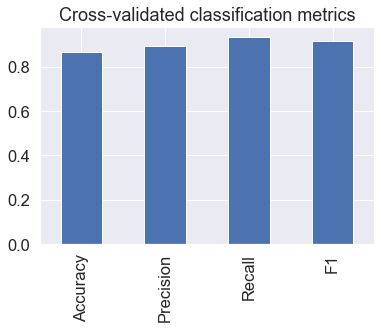

In [79]:
# Print and visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc_mean,
                           'Precision': cv_prec_mean,
                           'Recall': cv_recall_mean,
                           'F1': cv_f1_mean},
                     index=[0])
print(cv_metrics)

cv_metrics.T.plot(kind='bar',
                  title='Cross-validated classification metrics',
                 legend=False);

## Feature importance

Feature importance means asking 'which feature contributes the most to the outcomes of the model and how did they contribute?'


In [80]:
# Use the model that gave use best results in term of accuracy: Catboost RandomizedSearchCV
best_model.fit(X_train, y_train)

0:	learn: 0.4908682	total: 67.3ms	remaining: 13.4s
1:	learn: 0.4194458	total: 124ms	remaining: 12.3s
2:	learn: 0.3751819	total: 179ms	remaining: 11.8s
3:	learn: 0.3589593	total: 232ms	remaining: 11.4s
4:	learn: 0.3434688	total: 293ms	remaining: 11.4s
5:	learn: 0.3350108	total: 367ms	remaining: 11.9s
6:	learn: 0.3269599	total: 448ms	remaining: 12.4s
7:	learn: 0.3216840	total: 531ms	remaining: 12.7s
8:	learn: 0.3173441	total: 593ms	remaining: 12.6s
9:	learn: 0.3108165	total: 632ms	remaining: 12s
10:	learn: 0.3077728	total: 668ms	remaining: 11.5s
11:	learn: 0.3052361	total: 733ms	remaining: 11.5s
12:	learn: 0.3031423	total: 894ms	remaining: 12.9s
13:	learn: 0.3019613	total: 959ms	remaining: 12.7s
14:	learn: 0.3006387	total: 1.03s	remaining: 12.7s
15:	learn: 0.2996452	total: 1.11s	remaining: 12.8s
16:	learn: 0.2977942	total: 1.17s	remaining: 12.6s
17:	learn: 0.2967146	total: 1.22s	remaining: 12.3s
18:	learn: 0.2957479	total: 1.29s	remaining: 12.3s
19:	learn: 0.2947436	total: 1.38s	remainin

161:	learn: 0.2316377	total: 8.95s	remaining: 2.1s
162:	learn: 0.2314334	total: 8.99s	remaining: 2.04s
163:	learn: 0.2313030	total: 9.02s	remaining: 1.98s
164:	learn: 0.2311225	total: 9.06s	remaining: 1.92s
165:	learn: 0.2309912	total: 9.1s	remaining: 1.86s
166:	learn: 0.2308625	total: 9.15s	remaining: 1.81s
167:	learn: 0.2305396	total: 9.19s	remaining: 1.75s
168:	learn: 0.2302674	total: 9.23s	remaining: 1.69s
169:	learn: 0.2300108	total: 9.26s	remaining: 1.63s
170:	learn: 0.2297815	total: 9.32s	remaining: 1.58s
171:	learn: 0.2296689	total: 9.4s	remaining: 1.53s
172:	learn: 0.2294944	total: 9.51s	remaining: 1.48s
173:	learn: 0.2292393	total: 9.58s	remaining: 1.43s
174:	learn: 0.2288646	total: 9.62s	remaining: 1.37s
175:	learn: 0.2287578	total: 9.66s	remaining: 1.32s
176:	learn: 0.2283487	total: 9.73s	remaining: 1.26s
177:	learn: 0.2282617	total: 9.79s	remaining: 1.21s
178:	learn: 0.2279401	total: 9.83s	remaining: 1.15s
179:	learn: 0.2276728	total: 9.88s	remaining: 1.1s
180:	learn: 0.22

In [88]:
# Check best_model feature importance
best_model_feat = best_model.get_feature_importance()
best_model_feat

array([12.77346334,  1.26775709,  3.03356217,  1.60932448,  9.1973369 ,
        6.29882262,  4.28403262, 20.63580089,  0.51955146,  1.93768995,
       24.05957824,  6.98890236,  6.23397512,  1.16020277,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [87]:
feature_dict = dict(zip(df1.columns, list(best_model_feat)))
feature_dict

{'age': 12.773463343340515,
 'workclass': 1.2677570866024819,
 'fnlwgt': 3.0335621686238783,
 'education': 1.6093244759602983,
 'education_num': 9.197336901375511,
 'marital_status': 6.298822620267535,
 'occupation': 4.284032615564992,
 'relationship': 20.635800887267987,
 'race': 0.5195514618713597,
 'sex': 1.937689951593869,
 'capital_gain': 24.059578238300766,
 'capital_loss': 6.98890235877965,
 'hours_per_week': 6.233975119875873,
 'native_country': 1.1602027705752926,
 'class': 0.0,
 'workclass_is_missing': 0.0,
 'education_is_missing': 0.0,
 'marital_status_is_missing': 0.0,
 'occupation_is_missing': 0.0,
 'relationship_is_missing': 0.0,
 'race_is_missing': 0.0,
 'sex_is_missing': 0.0,
 'native_country_is_missing': 0.0}

<Figure size 720x432 with 0 Axes>

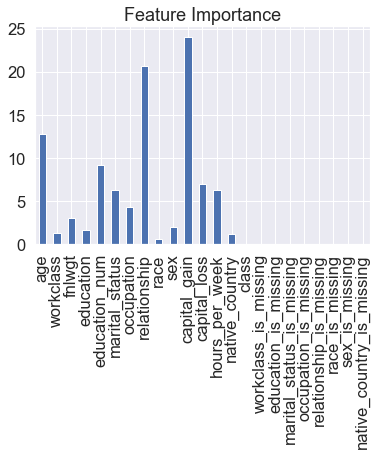

In [90]:
# Plot the feature importance on a barplot
plt.figure(figsize=(10,6))
feat_df = pd.DataFrame(feature_dict, index=[0])
feat_df.T.plot(kind='bar', title='Feature Importance', legend=False);

## Conclusion

* The 